# **UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE**

## **INSTITUTO METRÓPOLE DIGITAL**

### **CIÊNCIA DE DADOS**

DOCENETE: DANIEL SABINO

DISCENTES: EDUARDA CHIESA E SIDNEY ALVES

## Importação das bibliotecas e carregamento da base de dados

In [2]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

### Formatando base de dados

Acessando os arquivos

In [3]:
diretorio = './Base_Dados'
arquivos = os.listdir(diretorio)
arquivos.sort()

print(f'Quantidade de arquivos: {len(arquivos)}')
print('Listagem dos arquivos:')

for arquivo in arquivos:
    print('\t', arquivo)

Quantidade de arquivos: 22
Listagem dos arquivos:
	 investimentos_cnpq_2002.csv
	 investimentos_cnpq_2003.csv
	 investimentos_cnpq_2004.csv
	 investimentos_cnpq_2005.csv
	 investimentos_cnpq_2006.csv
	 investimentos_cnpq_2007.csv
	 investimentos_cnpq_2008.csv
	 investimentos_cnpq_2009.csv
	 investimentos_cnpq_2010.csv
	 investimentos_cnpq_2011.csv
	 investimentos_cnpq_2012.csv
	 investimentos_cnpq_2013.csv
	 investimentos_cnpq_2014.csv
	 investimentos_cnpq_2015.csv
	 investimentos_cnpq_2016.csv
	 investimentos_cnpq_2017.csv
	 investimentos_cnpq_2018.csv
	 investimentos_cnpq_2019.csv
	 investimentos_cnpq_2020.csv
	 investimentos_cnpq_2021.csv
	 investimentos_cnpq_2022.csv
	 investimentos_cnpq_2023.csv


Carregando as bases de dados desde 2002 até 2018, pois ambas possuem o mesmo *encoding = 'latin-1'*.

```df = []``` é responsável por armazenar os datasets individuais de cada ano e gerar o conjunto de dados final.

In [4]:
df = []
arquivos_2002_2018 = arquivos[:-5]

for arquivo in arquivos_2002_2018:

    header = None
    df_temp = []
    caminho = os.path.join(diretorio, arquivo)

    with open(caminho, 'r', encoding='latin-1') as f:
        data = csv.reader(f, delimiter=',')
        for i, linha in enumerate(data):
            if i == 0:
                header = linha
            else:
                df_temp.append(linha)
    
    df.append(pd.DataFrame(df_temp, columns=header))

In [5]:
for i, data in enumerate(df):
    print(f'Número de linhas x colunas do df de {2002+i}: {len(data)} x {len(data.columns)}')

Número de linhas x colunas do df de 2002: 21667 x 21
Número de linhas x colunas do df de 2003: 34520 x 21
Número de linhas x colunas do df de 2004: 42225 x 21
Número de linhas x colunas do df de 2005: 44634 x 21
Número de linhas x colunas do df de 2006: 48524 x 21
Número de linhas x colunas do df de 2007: 59214 x 21
Número de linhas x colunas do df de 2008: 94840 x 21
Número de linhas x colunas do df de 2009: 127633 x 21
Número de linhas x colunas do df de 2010: 157780 x 21
Número de linhas x colunas do df de 2011: 169064 x 21
Número de linhas x colunas do df de 2012: 182193 x 21
Número de linhas x colunas do df de 2013: 195332 x 21
Número de linhas x colunas do df de 2014: 207455 x 21
Número de linhas x colunas do df de 2015: 206491 x 21
Número de linhas x colunas do df de 2016: 171675 x 21
Número de linhas x colunas do df de 2017: 153539 x 21
Número de linhas x colunas do df de 2018: 155731 x 21


Carregando e formatando a base referente 2019. Essa base necessita da remoção de caractere `,` na coluna *Valor Pago* que estava sendo usado como separador das casas decimais e separador entre centena e milhar.

In [6]:
caminho = os.path.join(diretorio, arquivos[-5])
header = None
arquivo_2019 = []
with open(caminho, 'r', encoding='latin-1') as f:
    data = csv.reader(f)
    for i,linha in enumerate(data):
        if i == 0:
            header = linha
        else:
            if len(linha) == 21:
                linha[-1] = linha[-1].replace(',', '')
                arquivo_2019.append(linha)
            if len(linha) > 21:
                aux = linha[-2].replace(',', '')
                linha[:] = linha[:-2]
                linha.append(aux)
                arquivo_2019.append(linha)

arquivo_2019 = pd.DataFrame(arquivo_2019, columns=header)

Carregando e formatando a base referente 2020. A base vem com uma coluna extra referente aos índices e o *Valor Pago*, como os valores decimais são `,00`, basta somente remover os caracteres usados como separadores entre centena e milhar.

In [7]:
caminho = os.path.join(diretorio, arquivos[-4])
header = None
arquivo_2020 = []
with open(caminho, 'r', encoding='latin-1') as f:
    data = csv.reader(f, delimiter=';')
    for i,linha in enumerate(data):
        if i == 0:
            header = linha[1:]
        else:
            if len(linha) > 21:
                linha = linha[1:]
                linha[-1] = linha[-1].replace(',', '')
            arquivo_2020.append(linha)

arquivo_2020 = pd.DataFrame(arquivo_2020, columns=header)

Carregando e formatando a base referente 2021. Devemos corrigir a primeira coluna que possui caracteres adicionais, além de remover 10 colunas adicionais que estão vazias.

In [8]:
caminho = os.path.join(diretorio, arquivos[-3])
header = None
arquivo_2021 = []
with open(caminho, 'r', encoding='utf-8') as f:
    data = csv.reader(f, delimiter=';')
    for i,linha in enumerate(data):
        if i == 0:
            linha[0] = 'Ano Referência'
            linha = linha[:-10]
            header = linha
        else:
            linha = linha[:-10]
            linha[-1] = linha[-1].replace('.', '').replace(',', '.')
            arquivo_2021.append(linha)

arquivo_2021 = pd.DataFrame(arquivo_2021, columns=header) 

Carregando e formatando a base referente 2022. Foi necesário realizar split das colunas separando por `,` e remover caracteres adicionais.

In [9]:
caminho = os.path.join(diretorio, arquivos[-2])
header = None
arquivo_2022 = []
with open(caminho, 'r', encoding='latin-1') as f:
    data = csv.reader(f, delimiter=';')
    for i,linha in enumerate(data):
        if i > 4:
            if i == 5:
                linha = linha[0].split(',')
                header = linha
            if i > 5:
                linha = linha[0].replace('"', '')
                linha = linha.split(',')
                linha = linha[:-1]
                linha[-1] = linha[-1][3:]
                if len(linha) < 29:
                    try:
                        arquivo_2022.append(linha)
                    except:
                        pass

arquivo_2022 = arquivo_2022[1:]
arquivo_2022 = pd.DataFrame(arquivo_2022, columns=header)

Carregando e formatando a base referente 2023. É feita a remoção de caracteres desnecessários, assim como a remoção de colunas adicionais.

In [10]:
caminho = os.path.join(diretorio, arquivos[-1])
header = None
arquivo_2023 = []
with open(caminho, 'r', encoding='utf-8') as f:
    data = csv.reader(f, delimiter=';')
    for i,linha in enumerate(data):
        if i > 4:
            linha = linha[:27]
            if i == 5:
                header = linha
            if i > 5:
                linha[-1] = linha[-1][3:]
                linha[-1] = linha[-1].replace('.','')
                linha[-1] = float(linha[-1].replace(',', '.'))
                arquivo_2023.append(linha)

arquivo_2023 = pd.DataFrame(arquivo_2023, columns=header)

## Pré processamento dos dados

As bases de dados carregadas apresentam valores faltantes, caracteres indesejados e os atributos que deveriam ser numéricos são do tipo texto. Esses problemas foram observados durante o processo de carregamento, por isso o processo de remoção e conversão será aplicado a cada base de dados.

Como visto no site [Tabela de Valores de Bolsas no País](https://www.gov.br/cnpq/pt-br/acesso-a-informacao/bolsas-e-auxilios/copy_of_modalidades/tabela-de-valores-no-pais) o valor máximo para bolsas é de *R$ 14.000,00* e o valor mínimo é de *R$ 300,00*, há variações na base de dados onde há investimentos de bolsas com valores mínimos de *R$ 200,00* e valores que ultrapassam *R$ 50.000,00*. Com isso uma filtragem será realizada para manter dentro da faixa de valores *R$ 200,00* e *R$ 50.000,00*.

Corrigindo os dados entre 2002 e 2018.

In [11]:
for i, df_ in enumerate(df):
    df_ = df_.drop(df_[df_['Valor Pago'] == ''].index)
    df_ = df_.dropna()
    df_['Ano Referência'] = df_['Ano Referência'].apply(lambda x : int(x))
    df_['Valor Pago'] = df_['Valor Pago'].apply(lambda x : x.replace(',', '.'))
    df_['Valor Pago'] = df_['Valor Pago'].apply(lambda x : float(x))
    filtro = (df_['Valor Pago'] >= 200.0) & (df_['Valor Pago'] <= 50000.0)
    df[i] = df_[filtro]

Corrigindo os dados de 2019.

In [12]:
arquivo_2019['Ano Referência'] = arquivo_2019['Ano Referência'].apply(lambda x : int(x))
arquivo_2019['Valor Pago'] = arquivo_2019['Valor Pago'].apply(lambda x : float(x))
filtro = (arquivo_2019['Valor Pago'] >= 200.0) & (arquivo_2019['Valor Pago'] <= 50000.0)
arquivo_2019 = arquivo_2019[filtro]

Corrigindo os dados de 2020.

In [13]:
arquivo_2020['Ano Referência'] = arquivo_2020['Ano Referência'].apply(lambda x : int(x))
arquivo_2020['Valor Pago'] = arquivo_2020['Valor Pago'].apply(lambda x : float(x))
filtro = (arquivo_2020['Valor Pago'] >= 200.0) & (arquivo_2020['Valor Pago'] <= 50000.0)
arquivo_2020 = arquivo_2020[filtro]

Corrigindo os dados de 2021.

In [14]:
arquivo_2021 = arquivo_2021.drop(arquivo_2021[arquivo_2021['Ano Referência'] == ''].index)
arquivo_2021['Ano Referência'] = arquivo_2021['Ano Referência'].apply(lambda x : int(x))
arquivo_2021['Valor Pago'] = arquivo_2021['Valor Pago'].apply(lambda x : float(x))
filtro = (arquivo_2021['Valor Pago'] >= 200.0) & (arquivo_2021['Valor Pago'] <= 50000.0)
arquivo_2021 = arquivo_2021[filtro]

Corrigindo os dados de 2022. Essa base de dados contém informações adicionadas em locais indevidos e para isso textos devem ser verificados nos campos numéricos.

In [15]:
def tem_letra(texto):
    for c in texto:
        if c.isalpha():
            return True
    return False

arquivo_2022 = arquivo_2022.dropna()
mascara = arquivo_2022['Valor Pago'].apply(tem_letra)
mascara = ~mascara # inverter mascara para deixar as linhas sem letras
arquivo_2022 = arquivo_2022[mascara]

In [16]:
arquivo_2022 = arquivo_2022.drop(arquivo_2022[arquivo_2022['Valor Pago'] == ''].index)
arquivo_2022 = arquivo_2022.drop(arquivo_2022[arquivo_2022['Ano Referência'] == 'Total pago'].index)
arquivo_2022['Ano Referência'] = arquivo_2022['Ano Referência'].apply(lambda x : int(x))
arquivo_2022['Valor Pago'] = arquivo_2022['Valor Pago'].apply(lambda x : float(x))
filtro = (arquivo_2022['Valor Pago'] >= 200.0) & (arquivo_2022['Valor Pago'] <= 50000.0)
arquivo_2022 = arquivo_2022[filtro]

Corrigindo os dados de 2023.

In [17]:
arquivo_2023['Ano Referência'] = arquivo_2023['Ano Referência'].apply(lambda x : int(x))
arquivo_2023['Valor Pago'] = arquivo_2023['Valor Pago'].apply(lambda x : float(x))
filtro = (arquivo_2023['Valor Pago'] >= 200.0) & (arquivo_2023['Valor Pago'] <= 50000.0)
arquivo_2023 = arquivo_2023[filtro]

As base de dados mais recentes possuem atributos adicionais, como os dados mais antigos não possuem essas novas colunas, iremos manter as colunas em comum entre as bases de dados.

In [18]:
lista_interesse = ['Ano Referência', 'Processo', 'Beneficiário', 'Linha de Fomento', 'Modalidade', 'Categoria/Nível', 'Nome Chamada', 'Programa CNPq', 'Grande Área', 'Área', 'Subárea', 'Instituição Origem', 'Sigla UF Origem', 'País Origem', 'Instituição Destino', 'Sigla Instituição Destino', 'Sigla Instituição Macro', 'Cidade Destino', 'Sigla UF Destino', 'País Destino', 'Valor Pago']

In [19]:
col_exist_2019 = [coluna for coluna in lista_interesse if coluna in arquivo_2019.columns]
col_exist_2020 = [coluna for coluna in lista_interesse if coluna in arquivo_2020.columns]
col_exist_2021 = [coluna for coluna in lista_interesse if coluna in arquivo_2021.columns]
col_exist_2022 = [coluna for coluna in lista_interesse if coluna in arquivo_2022.columns]
col_exist_2023 = [coluna for coluna in lista_interesse if coluna in arquivo_2023.columns]

In [20]:
arquivo_2019 = arquivo_2019[col_exist_2019]
arquivo_2020 = arquivo_2020[col_exist_2020]
arquivo_2021 = arquivo_2021[col_exist_2021]
arquivo_2022 = arquivo_2022[col_exist_2022]
arquivo_2023 = arquivo_2023[col_exist_2023]

Gerando o dataset geral com todas as bases de dados.

In [21]:
df.append(arquivo_2019)
del(arquivo_2019)
df.append(arquivo_2020)
del(arquivo_2020)
df.append(arquivo_2021)
del(arquivo_2021) 
df.append(arquivo_2022)
del(arquivo_2022)
df.append(arquivo_2023)
del(arquivo_2023)

dataset = pd.concat(df, axis=0, ignore_index=True)
del(df)

Verificando os tipos de dados no dataset.

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2680023 entries, 0 to 2680022
Data columns (total 21 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Ano Referência             int64  
 1   Processo                   object 
 2   Beneficiário               object 
 3   Linha de Fomento           object 
 4   Modalidade                 object 
 5   Categoria/Nível            object 
 6   Nome Chamada               object 
 7   Programa CNPq              object 
 8   Grande Área                object 
 9   Área                       object 
 10  Subárea                    object 
 11  Instituição Origem         object 
 12  Sigla UF Origem            object 
 13  País Origem                object 
 14  Instituição Destino        object 
 15  Sigla Instituição Destino  object 
 16  Sigla Instituição Macro    object 
 17  Cidade Destino             object 
 18  Sigla UF Destino           object 
 19  País Destino               object 
 20  Va

*Modalidade* e *Categoria/Nível* trazem a mesma informação em relação as bolsa. O interessão é voltado para as instituições que foram beneficiadas (destino) podendo remover informações da *Origem*. Além disso, o interesse são as bolsas ofertadas no **Brasil**.

Referência: [Tabela de Valores de Bolsas no País](https://www.gov.br/cnpq/pt-br/acesso-a-informacao/bolsas-e-auxilios/copy_of_modalidades/tabela-de-valores-no-pais)

In [23]:
dataset['País Destino'].value_counts()

País Destino
BRA - Brasil             2613399
 -                         11987
ING - Inglaterra            9290
ESP - Espanha               8830
EUA - Estados Unidos        6650
                          ...   
ELS - El Salvador              1
RS - Sérvia                    1
EAU - Emirados Árabes          1
QUE - Quênia                   1
BOL - Bolívia                  1
Name: count, Length: 79, dtype: int64

In [24]:
dataset = dataset[dataset['País Destino'] == 'BRA - Brasil']
dataset = dataset.drop(columns=['Categoria/Nível', 'Instituição Origem', 'Sigla UF Origem', 'País Origem', 'País Destino'])

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2613399 entries, 0 to 2680022
Data columns (total 16 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Ano Referência             int64  
 1   Processo                   object 
 2   Beneficiário               object 
 3   Linha de Fomento           object 
 4   Modalidade                 object 
 5   Nome Chamada               object 
 6   Programa CNPq              object 
 7   Grande Área                object 
 8   Área                       object 
 9   Subárea                    object 
 10  Instituição Destino        object 
 11  Sigla Instituição Destino  object 
 12  Sigla Instituição Macro    object 
 13  Cidade Destino             object 
 14  Sigla UF Destino           object 
 15  Valor Pago                 float64
dtypes: float64(1), int64(1), object(14)
memory usage: 339.0+ MB


Para os valores numéricos, iremos observar a sua distribuição.

In [26]:
dataset.describe()

,Ano Referência,Valor Pago
count,2.613399e+06,2.613399e+06
mean,2.014469e+03,7.325644e+03
std,5.207181e+00,9.254286e+03
min,2.060000e+02,2.000000e+02
25%,2.011000e+03,1.600000e+03
50%,2.015000e+03,2.800000e+03
75%,2.019000e+03,1.100000e+04
max,2.023000e+03,5.000000e+04


Observando o *Ano Referência*.

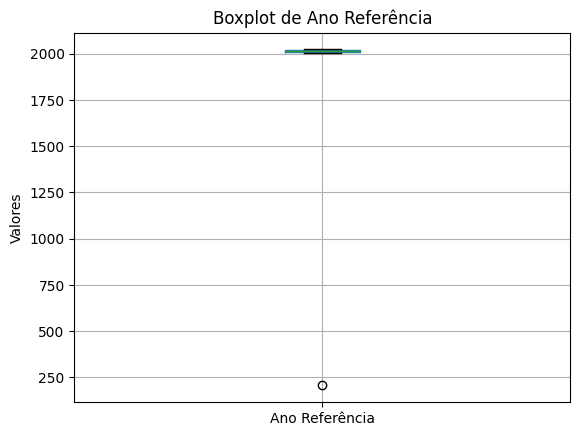

In [27]:
dataset[['Ano Referência']].boxplot()

plt.title('Boxplot de Ano Referência')
plt.ylabel('Valores')
plt.show()

É observado que há outliers em relação ao Ano Referência, é interessante verificar esses dados, 
pois durante a coleta pode ocorrer do preenchimento do ano ter sido com a falta de um caractere.

In [28]:
dataset[dataset['Ano Referência'] < 2002]

,Ano Referência,Processo,Beneficiário,Linha de Fomento,Modalidade,Nome Chamada,Programa CNPq,Grande Área,Área,Subárea,Instituição Destino,Sigla Instituição Destino,Sigla Instituição Macro,Cidade Destino,Sigla UF Destino,Valor Pago
168786,206,470276/2006-1,Lin Chau Ming,Apoio a Projetos de Pesquisas,APQ - Auxílio a Pesquisa,Edital MCT/CNPq 02/2006 - Universal,PROGRAMA BASICO DE BOTANICA,Ciências Biológicas,Botânica,Botânica Aplicada,Departamento de Horticultura,UNESP/BOTUCATU,UNESP,Botucatu,SP,6300.0


Como não sabemos se o valor 206.0 é referente a 2006 ou 2016 e é apenas um único registro, removelo não fará diferença na base de dados.

In [29]:
dataset = dataset.drop(dataset[dataset['Ano Referência'] == 206].index)

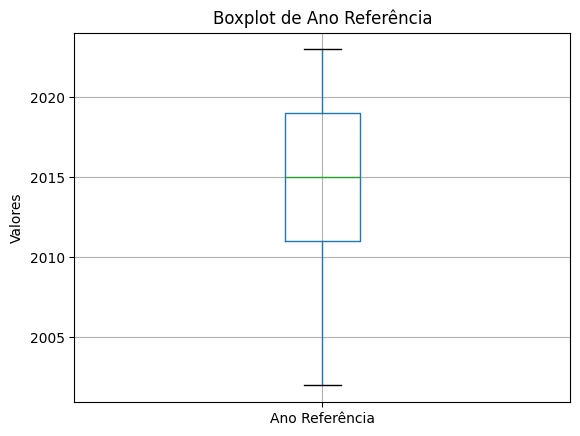

In [30]:
dataset[['Ano Referência']].boxplot()

plt.title('Boxplot de Ano Referência')
plt.ylabel('Valores')
plt.show()

In [31]:
dataset.describe()

,Ano Referência,Valor Pago
count,2.613398e+06,2.613398e+06
mean,2.014470e+03,7.325644e+03
std,5.085595e+00,9.254287e+03
min,2.002000e+03,2.000000e+02
25%,2.011000e+03,1.600000e+03
50%,2.015000e+03,2.800000e+03
75%,2.019000e+03,1.100000e+04
max,2.023000e+03,5.000000e+04


Observando o *Valor Pago*.

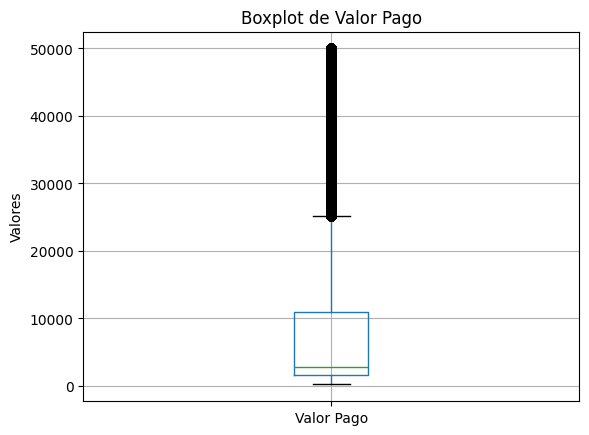

In [32]:
dataset[['Valor Pago']].boxplot()

plt.title('Boxplot de Valor Pago')
plt.ylabel('Valores')
plt.show()

Como visto no site [Tabela de Valores de Bolsas no País](https://www.gov.br/cnpq/pt-br/acesso-a-informacao/bolsas-e-auxilios/copy_of_modalidades/tabela-de-valores-no-pais) o valor máximo para bolsas é de *R$ 14.000,00* e o valor mínimo é de *R$ 300,00*, há variações na base de dados onde há investimentos de bolsas com valores mínimos de *R$ 200,00* e valores que ultrapassam *R$ 50.000,00*.

In [33]:
dataset.describe()

,Ano Referência,Valor Pago
count,2.613398e+06,2.613398e+06
mean,2.014470e+03,7.325644e+03
std,5.085595e+00,9.254287e+03
min,2.002000e+03,2.000000e+02
25%,2.011000e+03,1.600000e+03
50%,2.015000e+03,2.800000e+03
75%,2.019000e+03,1.100000e+04
max,2.023000e+03,5.000000e+04


Separando os estados presentes no dataset em suas respectivas regiões

In [34]:
#modificado
norte = ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO']
nordeste = ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']
centro_oeste = ['DF', 'GO', 'MT', 'MS']
sudeste = ['ES', 'MG', 'RJ', 'SP']
sul = ['PR', 'RS', 'SC']

## “Ao longo dos anos, como evoluiu a distribuição das bolsas por UF de destino?”

In [35]:
analise_1 = dataset.copy()
analise_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2613398 entries, 0 to 2680022
Data columns (total 16 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Ano Referência             int64  
 1   Processo                   object 
 2   Beneficiário               object 
 3   Linha de Fomento           object 
 4   Modalidade                 object 
 5   Nome Chamada               object 
 6   Programa CNPq              object 
 7   Grande Área                object 
 8   Área                       object 
 9   Subárea                    object 
 10  Instituição Destino        object 
 11  Sigla Instituição Destino  object 
 12  Sigla Instituição Macro    object 
 13  Cidade Destino             object 
 14  Sigla UF Destino           object 
 15  Valor Pago                 float64
dtypes: float64(1), int64(1), object(14)
memory usage: 339.0+ MB


In [36]:
for ano in dataset['Ano Referência'].unique():
    print(f'Possui registros de {ano}')

Possui registros de 2002
Possui registros de 2003
Possui registros de 2004
Possui registros de 2005
Possui registros de 2006
Possui registros de 2007
Possui registros de 2008
Possui registros de 2009
Possui registros de 2010
Possui registros de 2011
Possui registros de 2012
Possui registros de 2013
Possui registros de 2014
Possui registros de 2015
Possui registros de 2016
Possui registros de 2017
Possui registros de 2018
Possui registros de 2019
Possui registros de 2020
Possui registros de 2021
Possui registros de 2022
Possui registros de 2023


Removendo linhas que não foram preenchidas com informações.

In [37]:
analise_1 = analise_1.drop(analise_1[analise_1['Sigla UF Destino'] == ''].index)

Número de bolsas por UF

É realizado o agrupamento do *Ano Referência* e da *Sigla UF Destino* para realizar a contagem de ocorrências das linahs por grupo usando `.size()` e após isso é criada uma tabela. Com o uso do `.unstack(fill_value=0)`, *Sigla UF Destino* é transformada em coluna, enquanto *Ano Referência* permanece como linha e a relação entre ambos é a contagem de bolsas.

In [38]:
analise_1 = analise_1.groupby(['Ano Referência', 'Sigla UF Destino']).size()
analise_1 = analise_1.unstack(fill_value=0)
analise_1

Sigla UF Destino,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
Ano Referência,,,,,,,,,,,,,,,,,,,,,
2002,0,46,149,0,306,412,735,83,82,16,...,650,4171,175,7,0,2245,875,6,7642,0
2003,5,92,260,5,570,703,1194,157,202,61,...,1078,6175,345,10,11,3385,1307,45,10915,2
2004,13,127,330,5,795,898,1437,222,294,75,...,1376,7362,507,20,15,4034,1537,73,13159,6
2005,23,168,362,4,972,1082,1705,258,345,94,...,1527,7358,631,27,14,4238,1723,110,13697,17
2006,18,210,482,12,1062,1308,1911,235,467,90,...,1816,7831,675,44,15,4486,1929,138,14790,24
2007,37,184,620,24,1286,1595,2476,275,564,155,...,2223,9317,778,58,15,5705,2372,158,17503,52
2008,162,553,1258,86,2563,2810,4250,523,1123,470,...,4198,14076,1583,160,83,9180,3522,384,24679,238
2009,258,1022,1860,137,3691,4069,5907,799,1745,706,...,6036,18528,2425,270,127,12145,4636,713,31146,392
2010,300,1288,2124,138,5078,4966,6840,1070,2289,902,...,7555,26068,3366,385,181,14767,5622,1154,35730,538


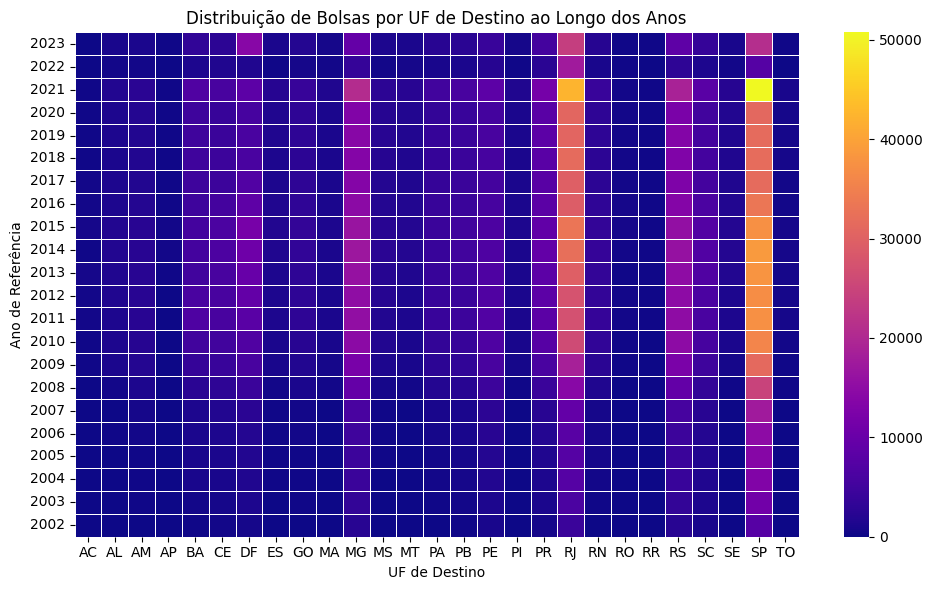

In [39]:
plt.figure(figsize=(10, 6))
sns.heatmap(analise_1, cmap='plasma', linewidths=0.5)
plt.title('Distribuição de Bolsas por UF de Destino ao Longo dos Anos', fontsize=12)
plt.xlabel('UF de Destino')
plt.ylabel('Ano de Referência')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

É observado que visualmente há UF's que possuem uma grande quantidade de *Auxílios e Bolsas* a quem são destinadas. Más como a escala é elevada, as instituições que recebem menos bolsas aparentam receber 0. Com isso a quantidade de bolsas será normalizada entre 0 e 1 dentro da mesma instituição ao passar dos anos, para que possamos analizar tal evolução em relação acada UF propria.

In [40]:
def min_max_scaler(dados):
    min = np.min(dados)
    max = np.max(dados)

    return (dados - min) / (max - min)

<Figure size 1000x600 with 0 Axes>

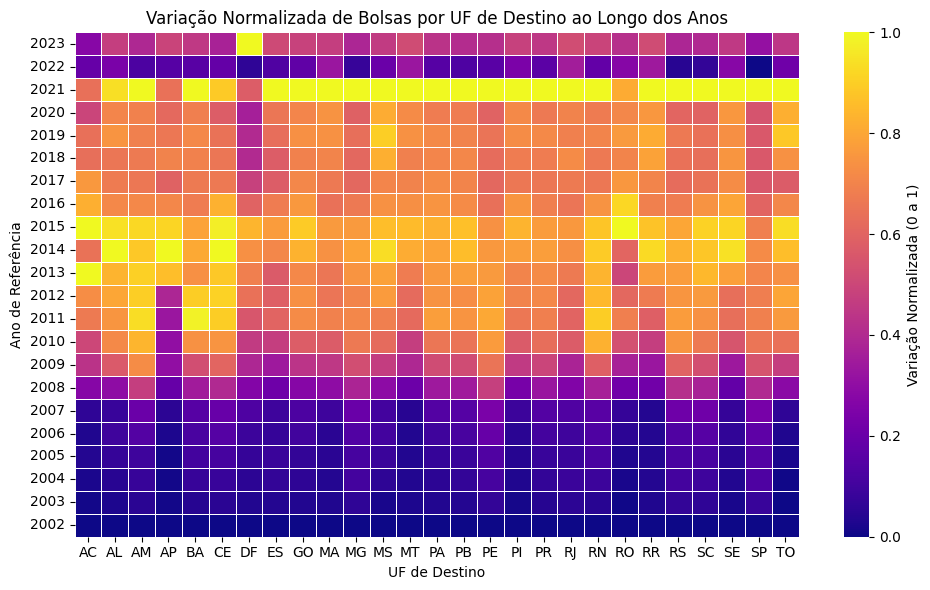

In [65]:
analize_1_norm = analise_1.copy()
for uf in analize_1_norm.columns:
    analize_1_norm[uf] = min_max_scaler(analize_1_norm[[uf]])

plt.figure(figsize=(10, 6))
sns.heatmap(analize_1_norm, cmap='plasma', linewidths=0.5, cbar_kws={'label': 'Variação Normalizada (0 a 1)'})
plt.title('Variação Normalizada de Bolsas por UF de Destino ao Longo dos Anos', fontsize=12)
plt.xlabel('UF de Destino')
plt.ylabel('Ano de Referência')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

Em 2022 aparenta haver queda na distribuição de *Auxílios e Bolsas*, mas como a base está filtrada com os valores entre *R$ 200,00* e *R$ 50.000,00*, algumas UF's receberam valores muito acima.

## “Em relação ao Valor Pago por bolsa, quais áreas e subáreas recebem a maior quantidade de recursos por região?”

In [42]:
analise_2 = dataset.copy()
analise_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2613398 entries, 0 to 2680022
Data columns (total 16 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Ano Referência             int64  
 1   Processo                   object 
 2   Beneficiário               object 
 3   Linha de Fomento           object 
 4   Modalidade                 object 
 5   Nome Chamada               object 
 6   Programa CNPq              object 
 7   Grande Área                object 
 8   Área                       object 
 9   Subárea                    object 
 10  Instituição Destino        object 
 11  Sigla Instituição Destino  object 
 12  Sigla Instituição Macro    object 
 13  Cidade Destino             object 
 14  Sigla UF Destino           object 
 15  Valor Pago                 float64
dtypes: float64(1), int64(1), object(14)
memory usage: 403.5+ MB


Para o *Valor Pago* em relação a *Área*.

In [43]:
#modificado
analise_2_area = analise_2.groupby(['Valor Pago', 'Sigla UF Destino'])['Área'].value_counts().sort_values(ascending=False).reset_index(name='Qtd Valor por Area')
analise_2_area

,Valor Pago,Sigla UF Destino,Área,Qtd Valor por Area
0,900.0,RJ,Matemática,37566
1,300.0,RJ,Matemática,37176
2,600.0,RJ,Matemática,12381
3,700.0,RJ,Matemática,12137
4,1300.0,DF,Multidisciplinar,9811
...,...,...,...,...
318948,50000.0,SP,Tecnologias Médicas e da Saúde,1
318949,50000.0,SP,Tecnologias para o Desenvolvimento Sustentável,1
318950,50000.0,SP,Zootecnia,1
318951,50000.0,TO,Agronomia,1


### Análise Por *Área*

Definindo dicionários para armazer as análises

In [ ]:
analise_2_norte = {}
analise_2_nordeste = {}
analise_2_centro_oeste = {}
analise_2_sudeste = {}
analise_2_sul = {}

for uf in norte:
    analise_2_norte[str(uf)] = None

for uf in nordeste:
    analise_2_nordeste[str(uf)] = None
    
for uf in centro_oeste:
    analise_2_centro_oeste[str(uf)] = None
    
for uf in sudeste:
    analise_2_sudeste[str(uf)] = None
    
for uf in sul:
    analise_2_sul[str(uf)] = None

In [ ]:
for uf in analise_2_norte.keys():
    analise_2_norte[uf] = analise_2_area[analise_2_area['Sigla UF Destino'] == uf][:10]

for uf in analise_2_nordeste.keys():
    analise_2_nordeste[uf] = analise_2_area[analise_2_area['Sigla UF Destino'] == uf][:10]

for uf in analise_2_centro_oeste.keys():
    analise_2_centro_oeste[uf] = analise_2_area[analise_2_area['Sigla UF Destino'] == uf][:10]

for uf in analise_2_sudeste.keys():
    analise_2_sudeste[uf] = analise_2_area[analise_2_area['Sigla UF Destino'] == uf][:10]

for uf in analise_2_sul.keys():
    analise_2_sul[uf] = analise_2_area[analise_2_area['Sigla UF Destino'] == uf][:10]

#### *Região Norte*

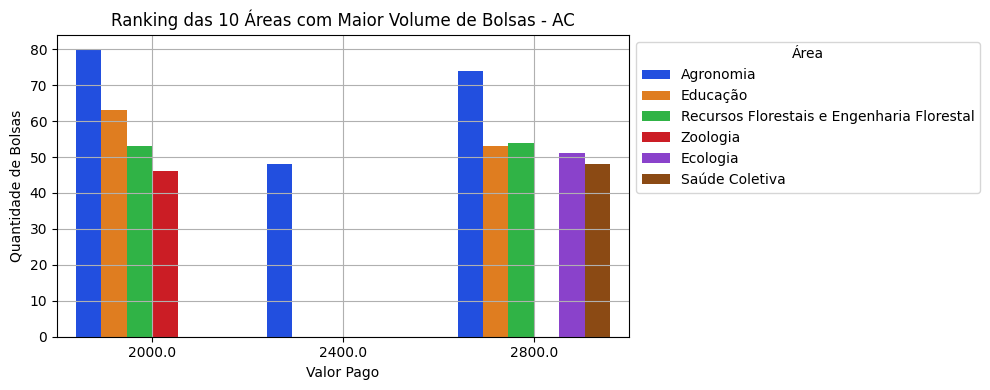

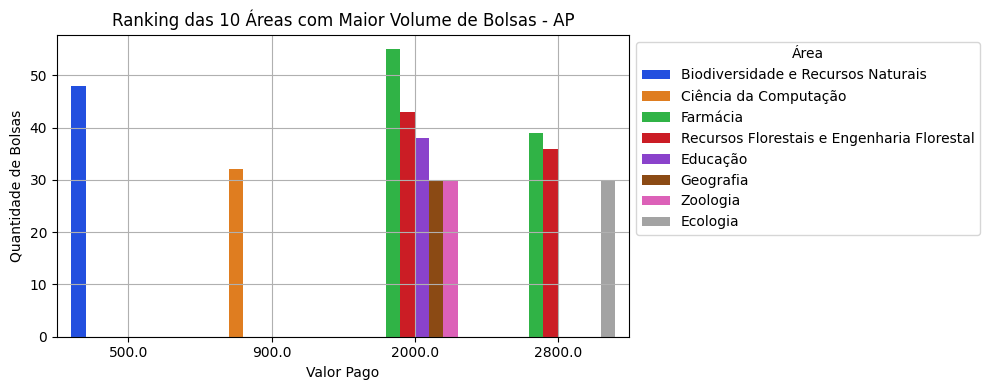

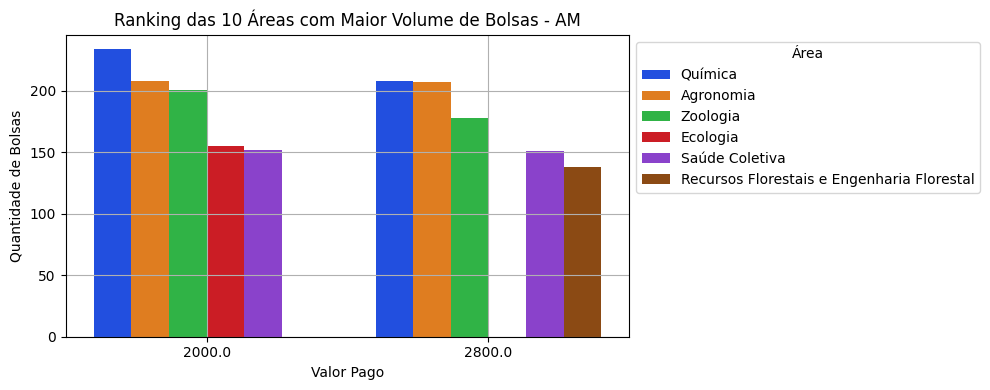

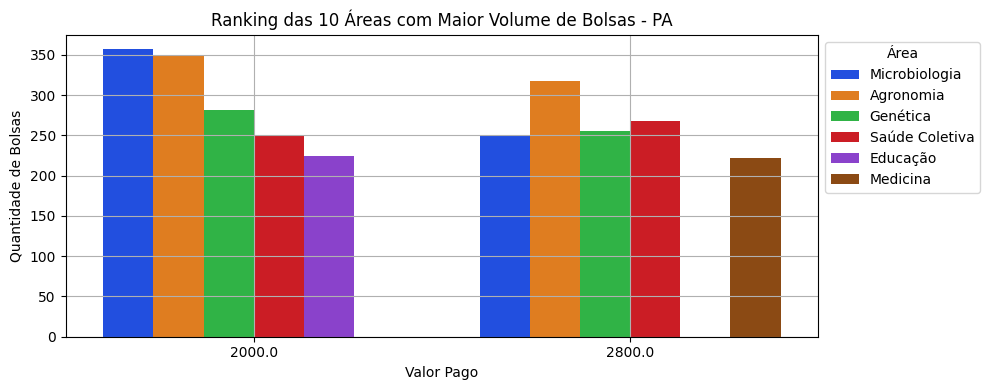

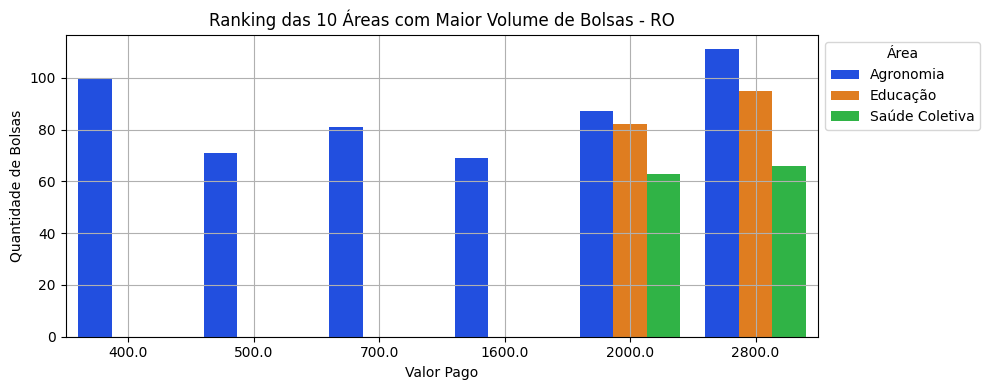

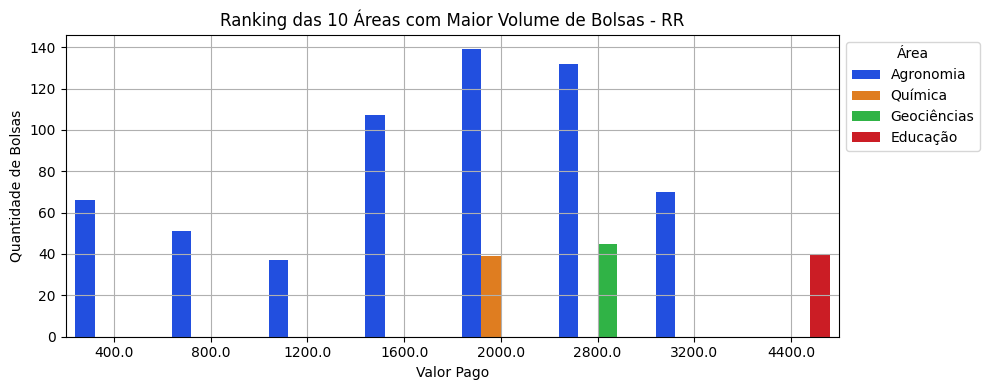

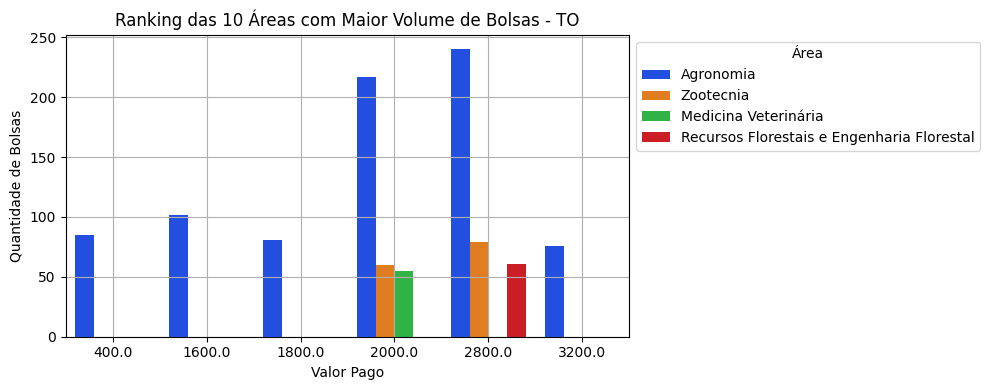

In [ ]:
for key, value in analise_2_norte.items():
    plt.figure(figsize=(10, 4))
    ax = sns.barplot(x='Valor Pago', y='Qtd Valor por Area', data=value, palette='bright', hue='Área', legend=True)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.title(f'Ranking das 10 Áreas com Maior Volume de Bolsas - {key}')
    plt.xlabel('Valor Pago')
    plt.ylabel('Quantidade de Bolsas')
    plt.tight_layout()
    plt.grid()
    plt.show()

#### *Região Nordeste*

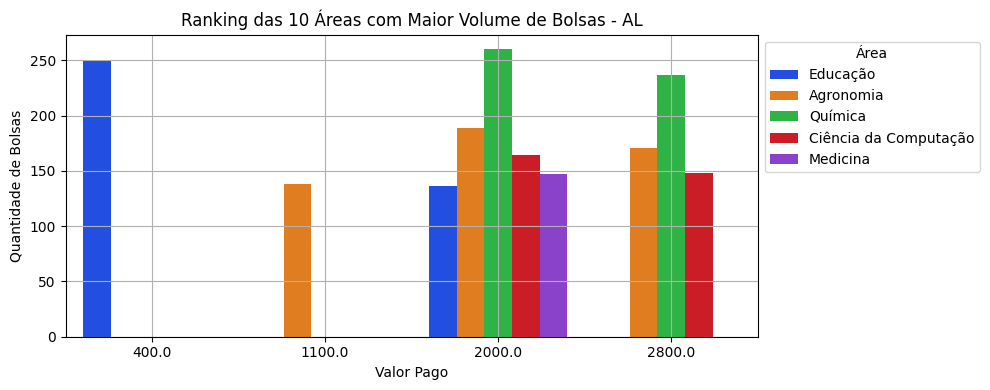

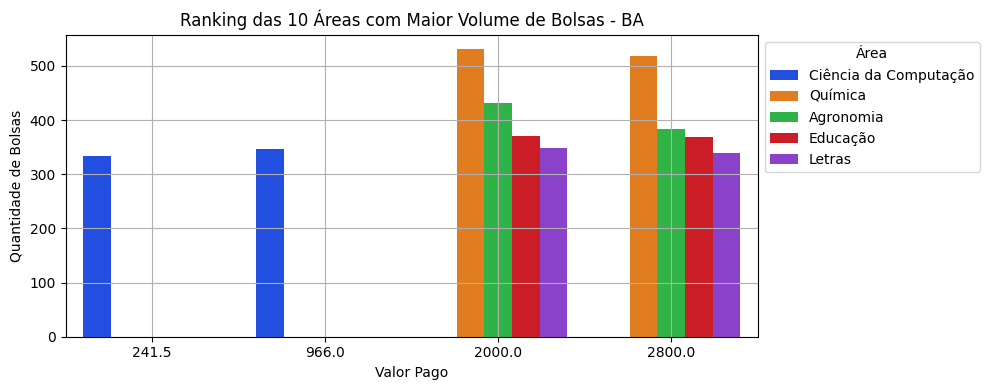

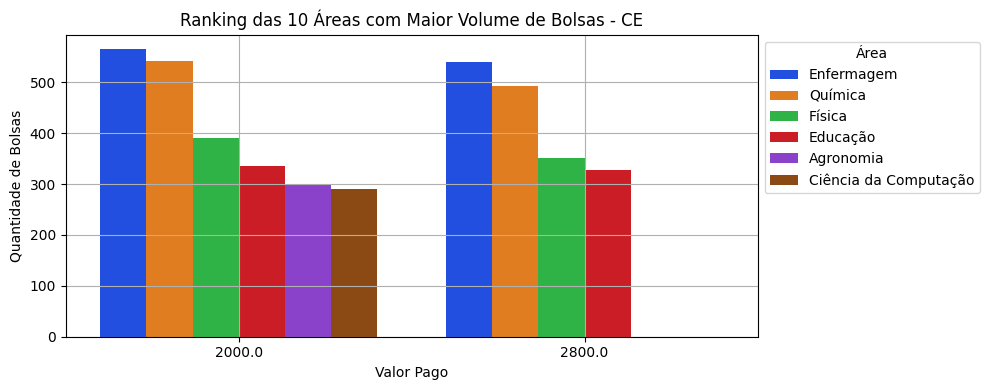

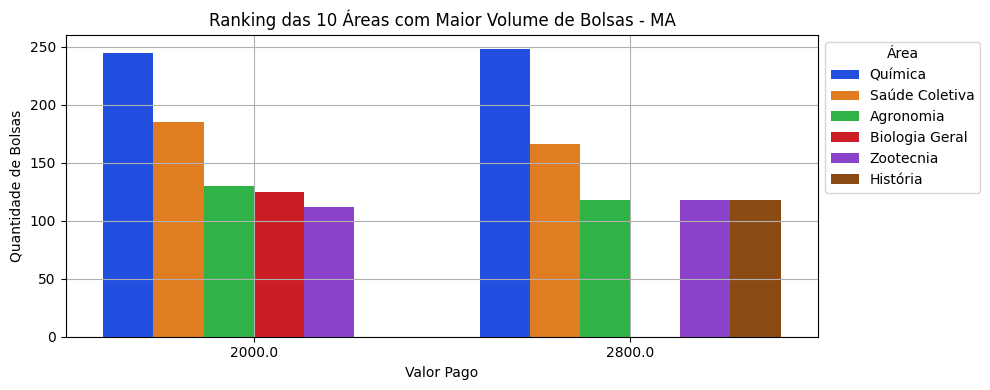

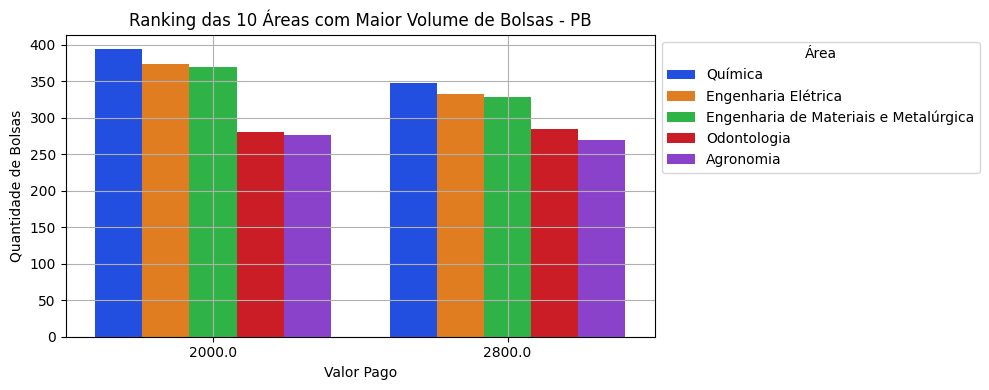

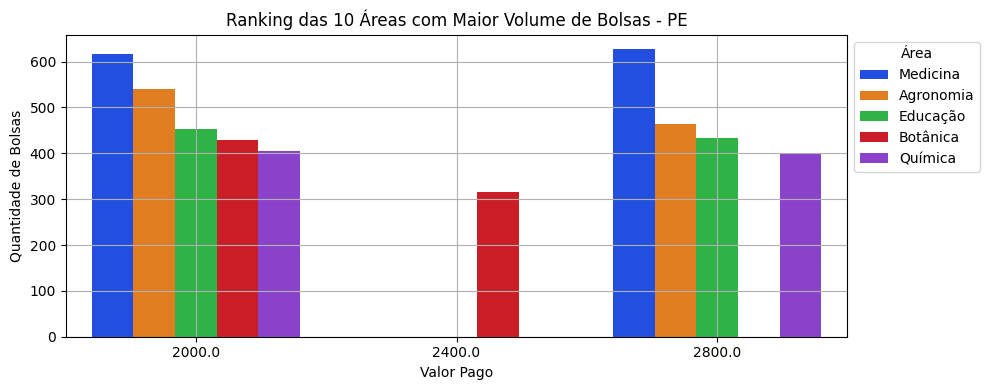

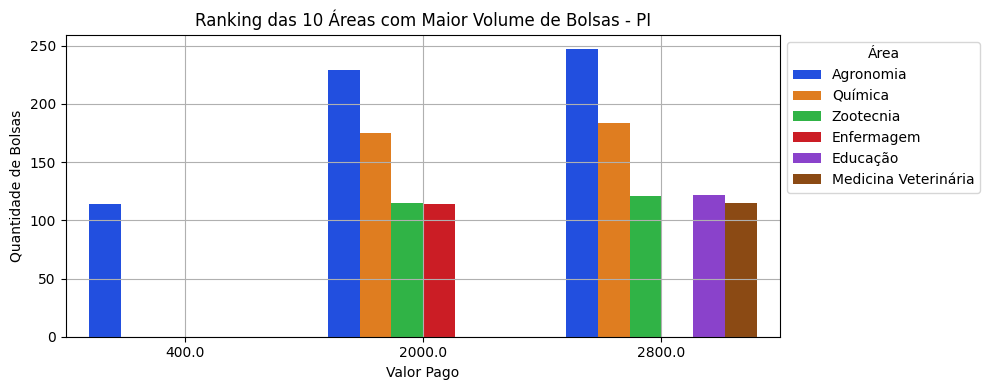

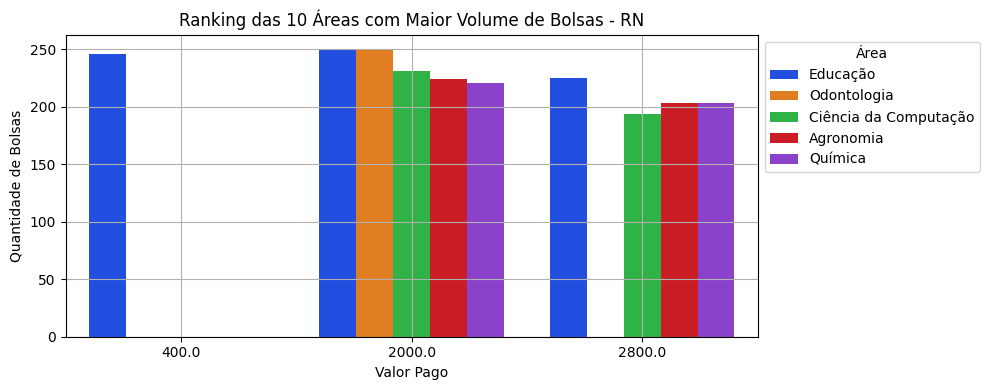

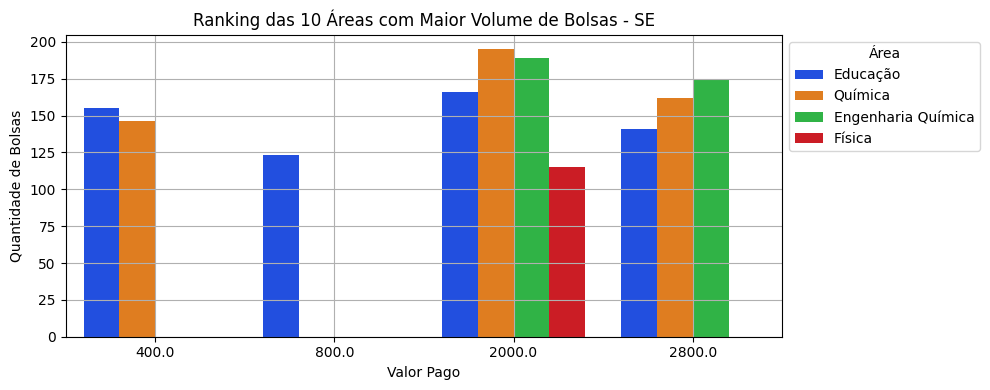

In [ ]:
for key, value in analise_2_nordeste.items():
    plt.figure(figsize=(10, 4))
    ax = sns.barplot(x='Valor Pago', y='Qtd Valor por Area', data=value, palette='bright', hue='Área', legend=True)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.title(f'Ranking das 10 Áreas com Maior Volume de Bolsas - {key}')
    plt.xlabel('Valor Pago')
    plt.ylabel('Quantidade de Bolsas')
    plt.tight_layout()
    plt.grid()
    plt.show()

#### *Região Centro-Oeste*

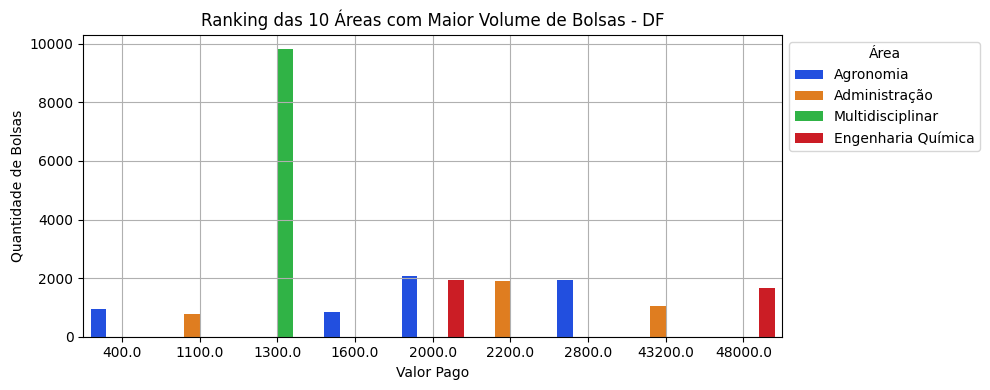

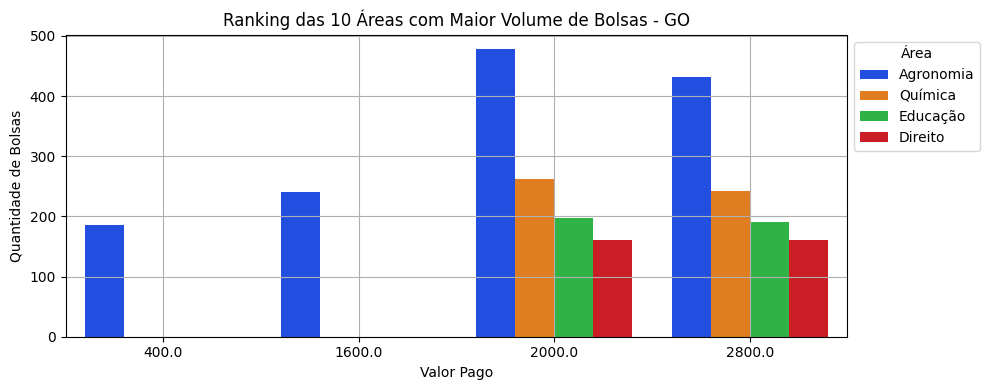

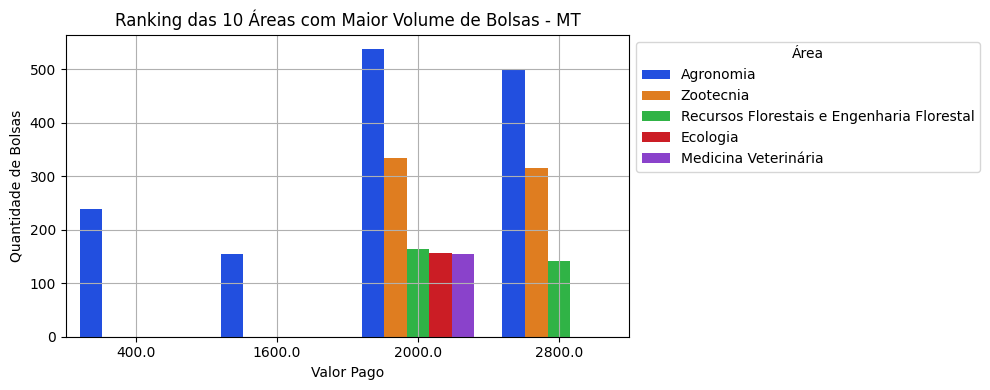

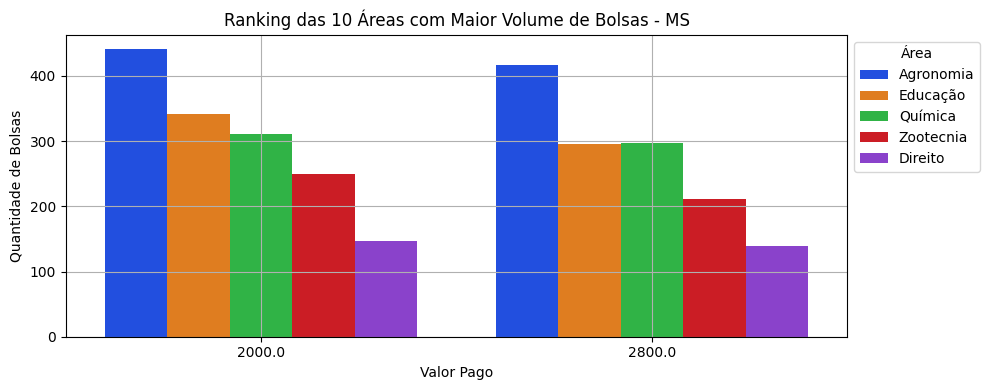

In [ ]:
for key, value in analise_2_centro_oeste.items():
    plt.figure(figsize=(10, 4))
    ax = sns.barplot(x='Valor Pago', y='Qtd Valor por Area', data=value, palette='bright', hue='Área', legend=True)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.title(f'Ranking das 10 Áreas com Maior Volume de Bolsas - {key}')
    plt.xlabel('Valor Pago')
    plt.ylabel('Quantidade de Bolsas')
    plt.tight_layout()
    plt.grid()
    plt.show()

#### *Região Sudeste*

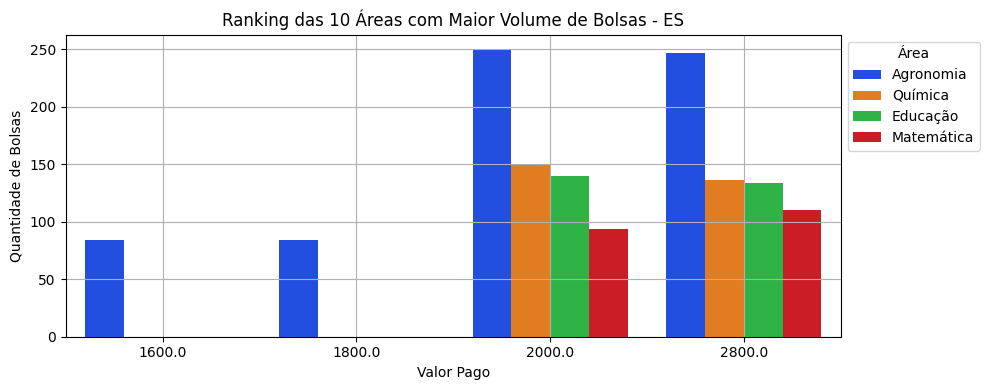

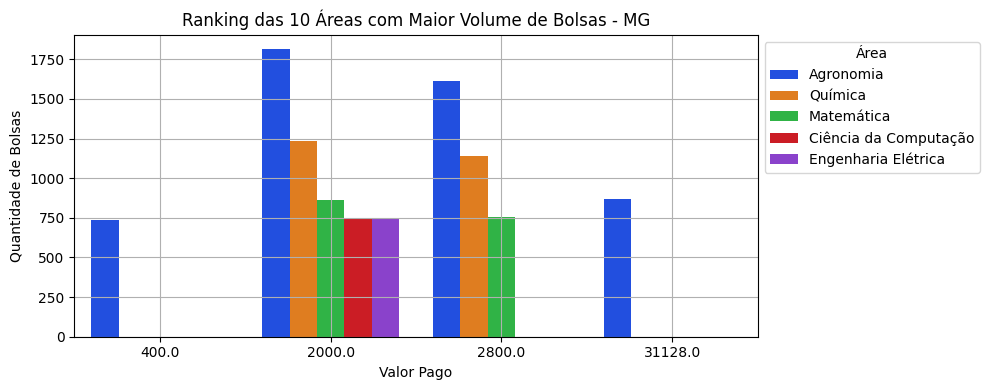

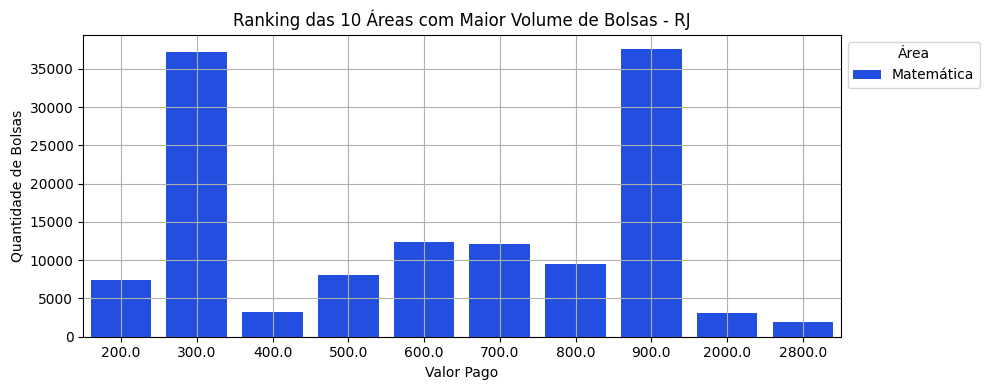

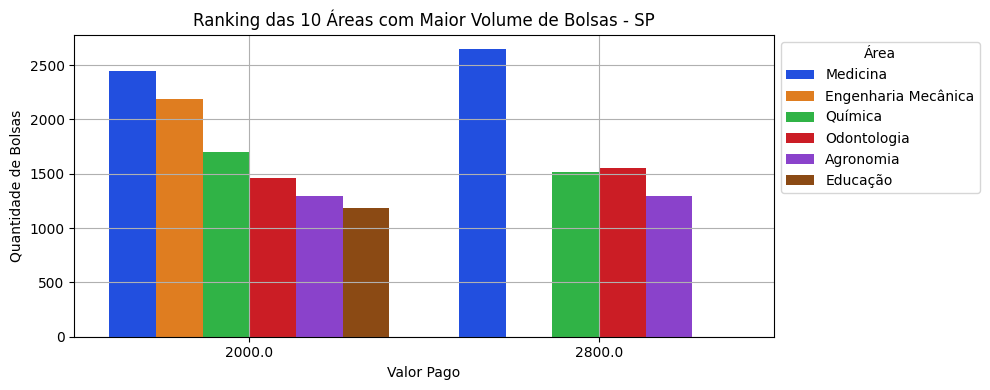

In [ ]:
for key, value in analise_2_sudeste.items():
    plt.figure(figsize=(10, 4))
    ax = sns.barplot(x='Valor Pago', y='Qtd Valor por Area', data=value, palette='bright', hue='Área', legend=True)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.title(f'Ranking das 10 Áreas com Maior Volume de Bolsas - {key}')
    plt.xlabel('Valor Pago')
    plt.ylabel('Quantidade de Bolsas')
    plt.tight_layout()
    plt.grid()
    plt.show()

#### *Região Sul*

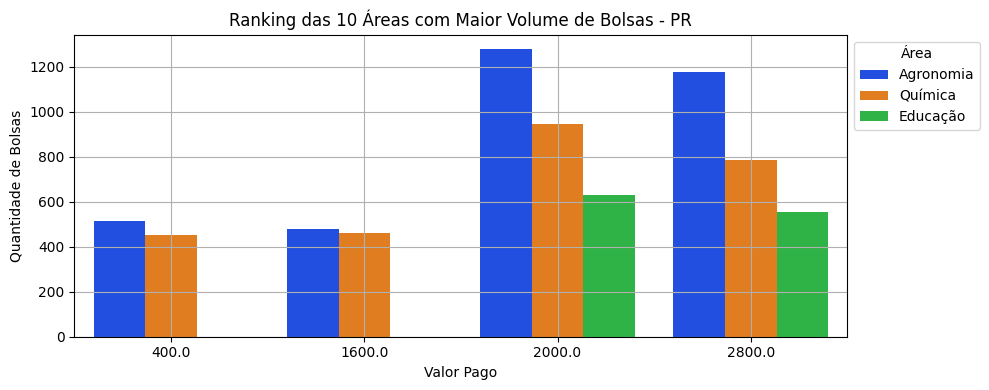

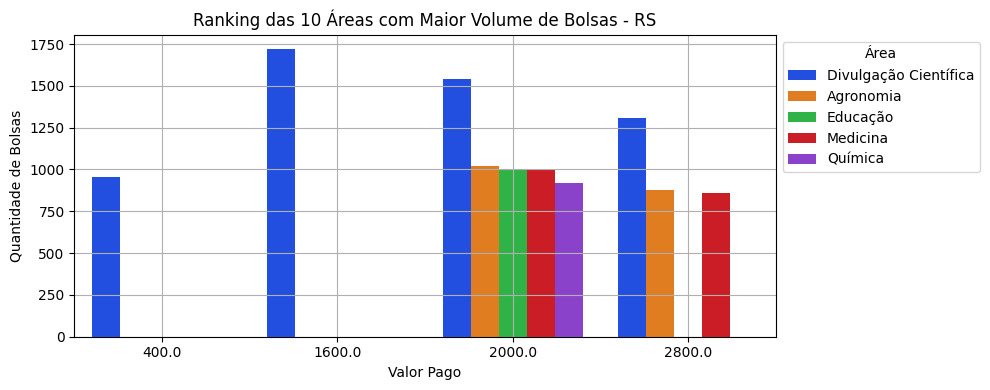

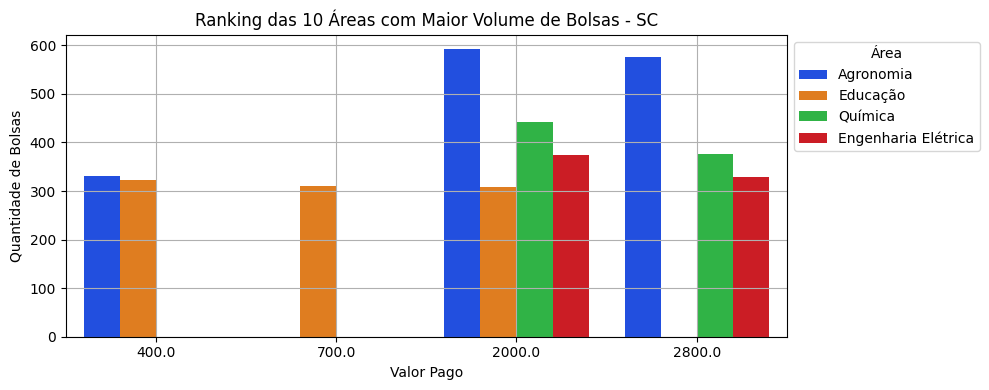

In [ ]:
for key, value in analise_2_sul.items():
    plt.figure(figsize=(10, 4))
    ax = sns.barplot(x='Valor Pago', y='Qtd Valor por Area', data=value, palette='bright', hue='Área', legend=True)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.title(f'Ranking das 10 Áreas com Maior Volume de Bolsas - {key}')
    plt.xlabel('Valor Pago')
    plt.ylabel('Quantidade de Bolsas')
    plt.tight_layout()
    plt.grid()
    plt.show()

### Análise Por *Subarea*

In [51]:
analise_2_subarea = analise_2.groupby(['Valor Pago', 'Sigla UF Destino'])['Subárea'].value_counts().sort_values(ascending=False).reset_index(name='Qtd Valor por Subarea')
analise_2_subarea

,Valor Pago,Sigla UF Destino,Subárea,Qtd Valor por Subarea
0,900.0,RJ,Geometria e Topologia,27448
1,300.0,RJ,Geometria e Topologia,24089
2,300.0,RJ,Matemática Aplicada,13072
3,600.0,RJ,Geometria e Topologia,11500
4,700.0,RJ,Geometria e Topologia,11380
...,...,...,...,...
658698,50000.0,SP,Teoria da Computação,1
658699,50000.0,SP,Transformação de Fases,1
658700,50000.0,SP,Oceanografia,1
658701,50000.0,SP,Oceanografia Geológica,1


Definindo dicionários para armazer as análises

In [ ]:
analise_2_norte = {}
analise_2_nordeste = {}
analise_2_centro_oeste = {}
analise_2_sudeste = {}
analise_2_sul = {}

for uf in norte:
    analise_2_norte[str(uf)] = None

for uf in nordeste:
    analise_2_nordeste[str(uf)] = None
    
for uf in centro_oeste:
    analise_2_centro_oeste[str(uf)] = None
    
for uf in sudeste:
    analise_2_sudeste[str(uf)] = None
    
for uf in sul:
    analise_2_sul[str(uf)] = None

In [53]:
#modificado
for uf in analise_2_norte.keys():
    analise_2_norte[uf] = analise_2_subarea[analise_2_subarea['Sigla UF Destino'] == uf][:20]

for uf in analise_2_nordeste.keys():
    analise_2_nordeste[uf] = analise_2_subarea[analise_2_subarea['Sigla UF Destino'] == uf][:20]

for uf in analise_2_centro_oeste.keys():
    analise_2_centro_oeste[uf] = analise_2_subarea[analise_2_subarea['Sigla UF Destino'] == uf][:20]

for uf in analise_2_sudeste.keys():
    analise_2_sudeste[uf] = analise_2_subarea[analise_2_subarea['Sigla UF Destino'] == uf][:20]

for uf in analise_2_sul.keys():
    analise_2_sul[uf] = analise_2_subarea[analise_2_subarea['Sigla UF Destino'] == uf][:20]

#### *Região Norte*

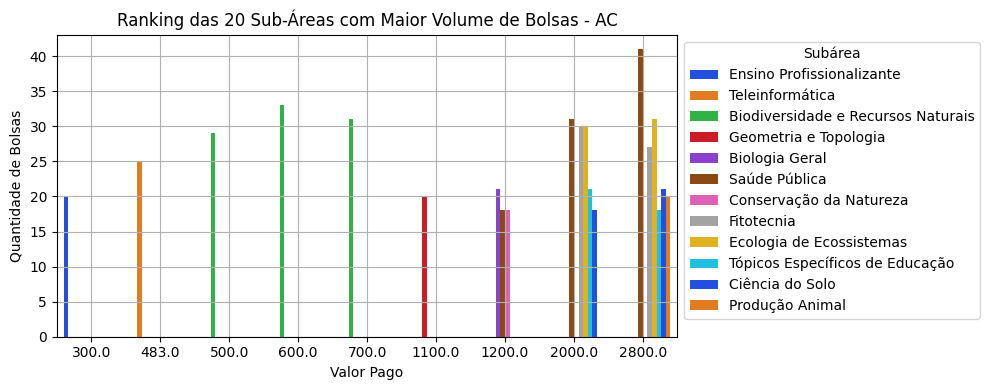

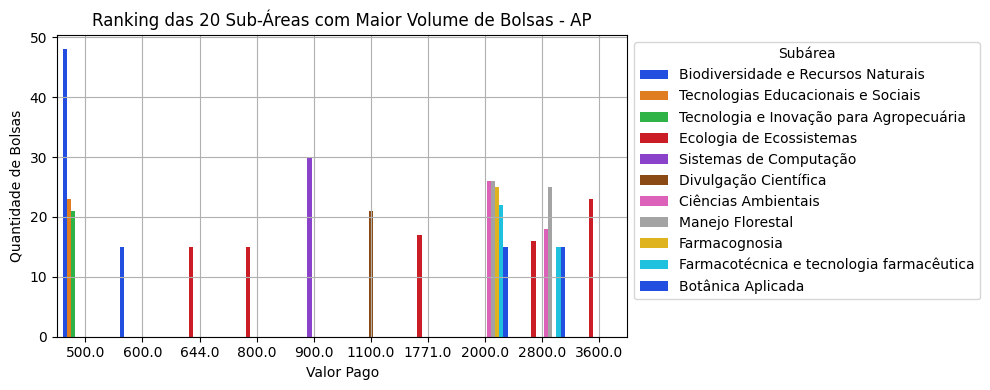

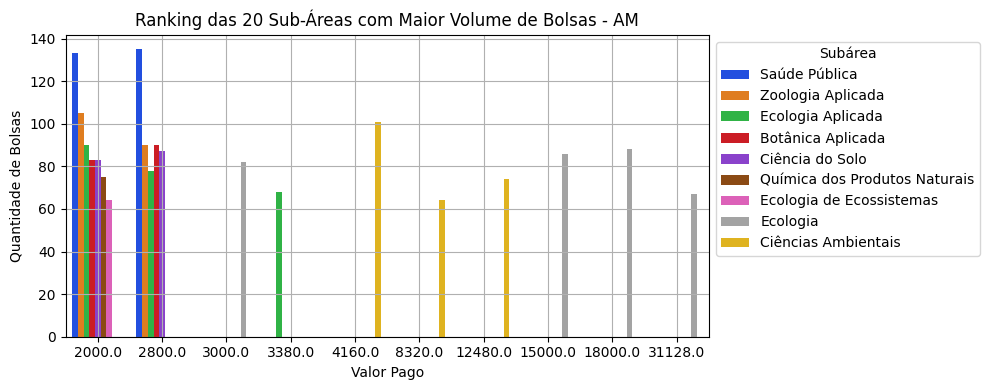

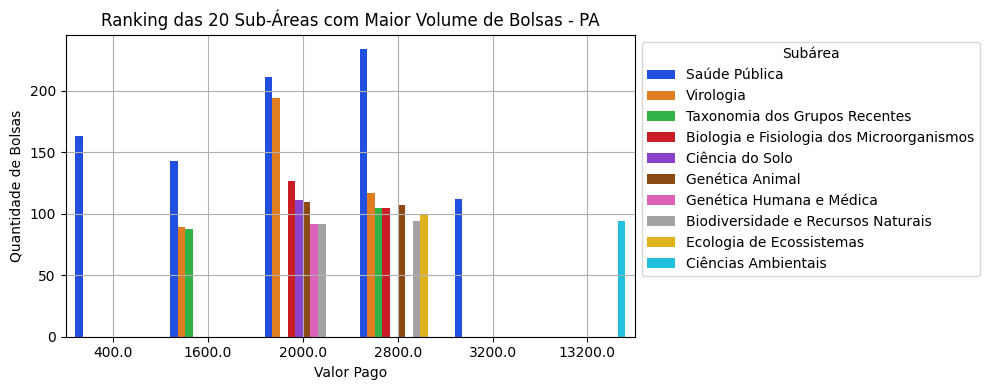

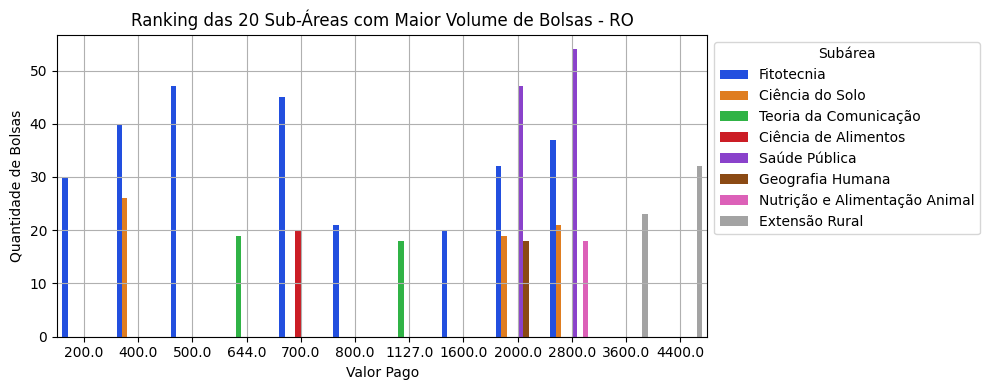

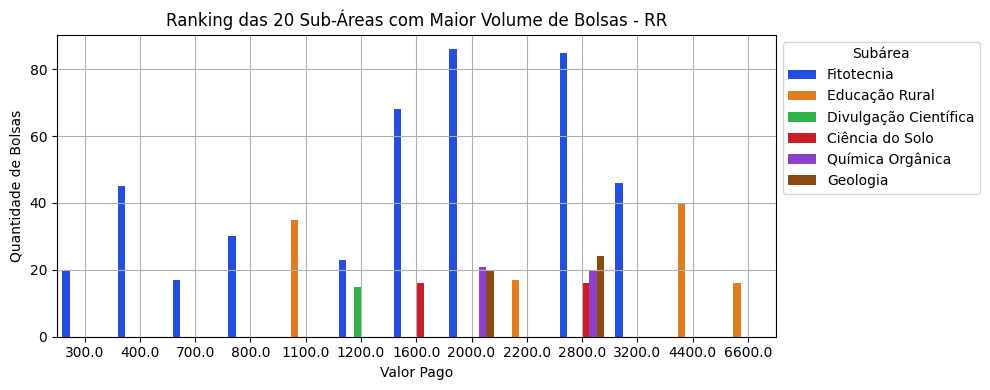

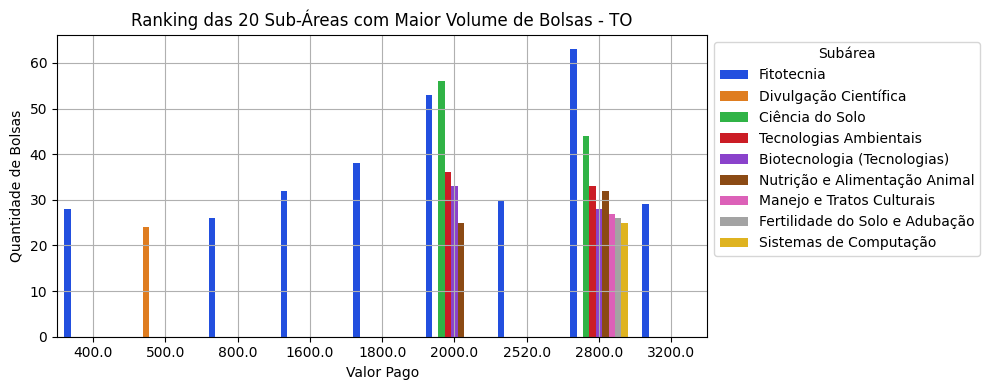

In [ ]:
for key, value in analise_2_norte.items():
    plt.figure(figsize=(10, 4))
    ax = sns.barplot(x='Valor Pago', y='Qtd Valor por Subarea', data=value, palette='bright', hue='Subárea', legend=True)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.title(f'Ranking das 20 Sub-Áreas com Maior Volume de Bolsas - {key}')
    plt.xlabel('Valor Pago')
    plt.ylabel('Quantidade de Bolsas')
    plt.tight_layout()
    plt.grid()
    plt.show()

#### *Região Nordeste*

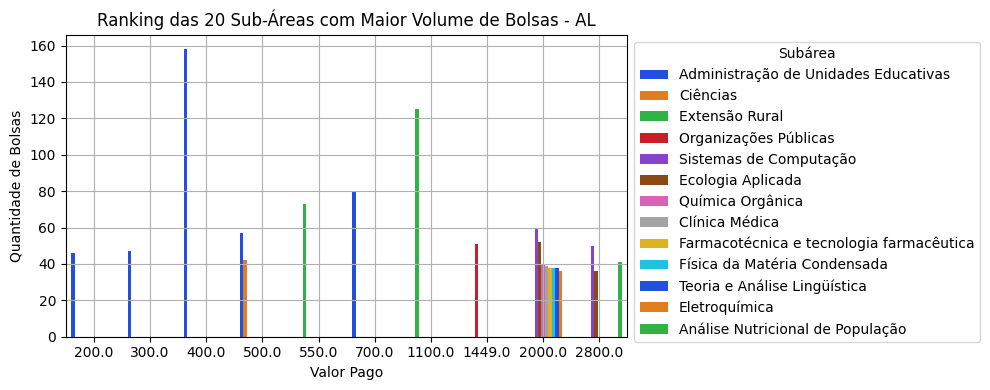

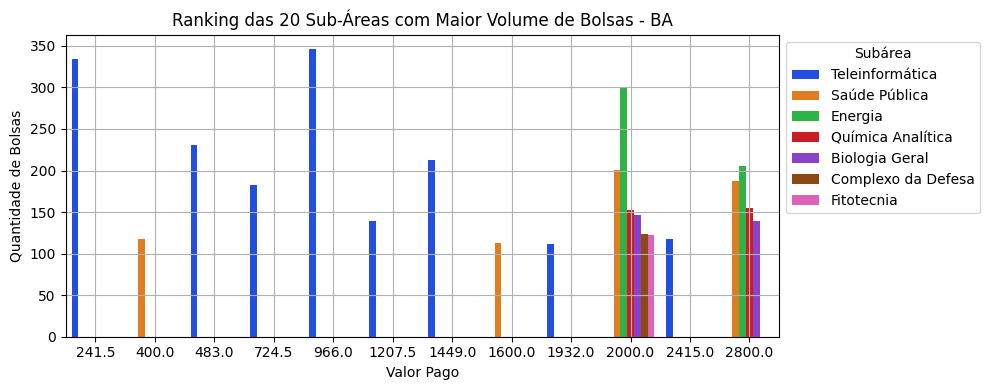

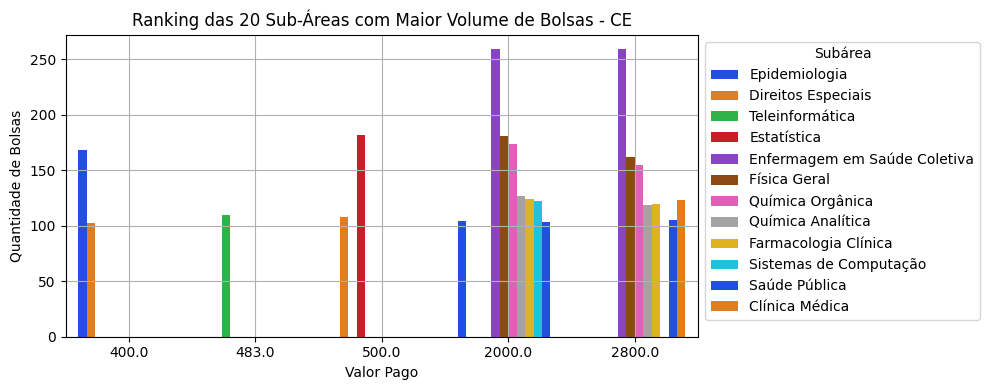

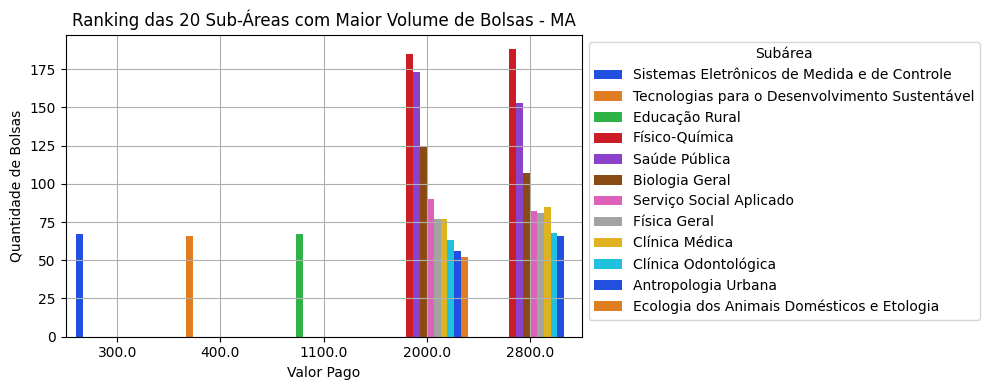

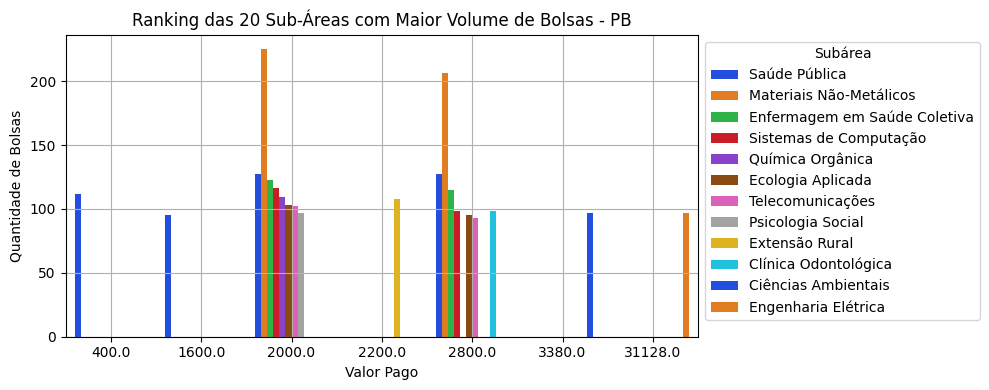

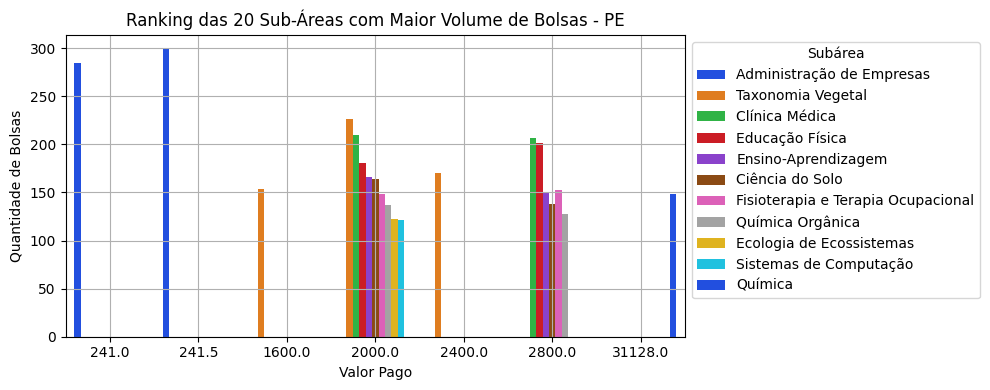

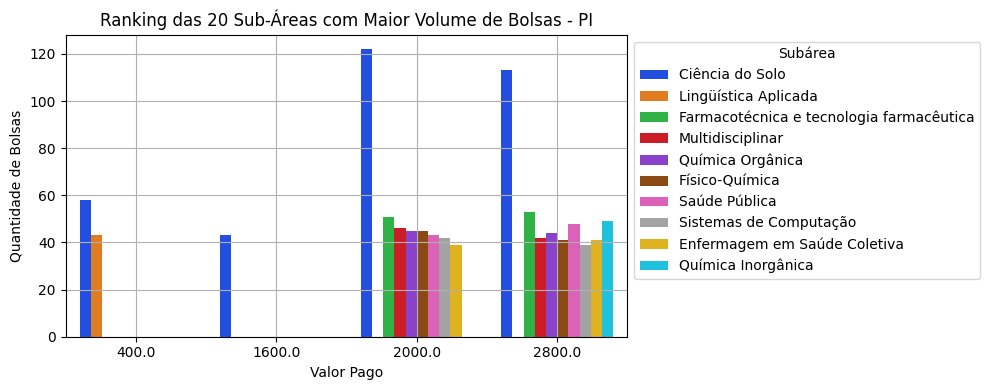

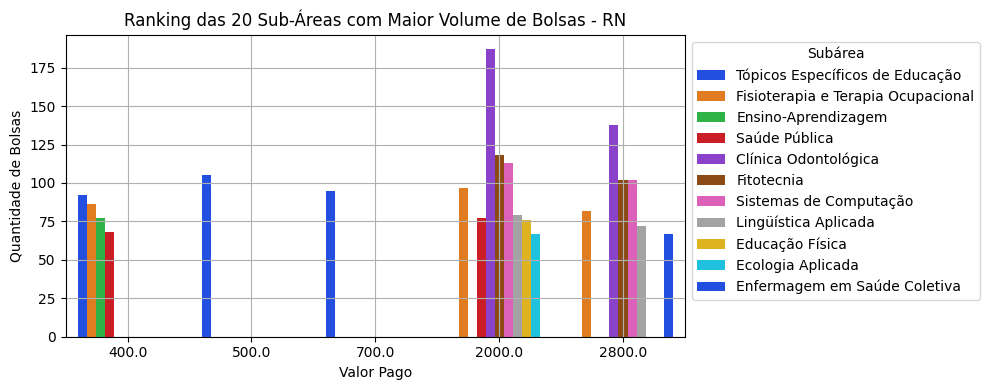

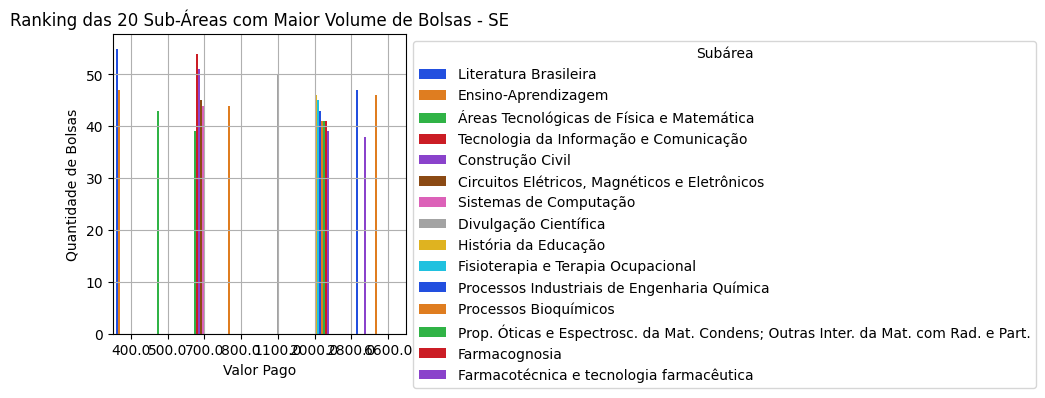

In [ ]:
for key, value in analise_2_nordeste.items():
    plt.figure(figsize=(10, 4))
    ax = sns.barplot(x='Valor Pago', y='Qtd Valor por Subarea', data=value, palette='bright', hue='Subárea', legend=True)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.title(f'Ranking das 20 Sub-Áreas com Maior Volume de Bolsas - {key}')
    plt.xlabel('Valor Pago')
    plt.ylabel('Quantidade de Bolsas')
    plt.tight_layout()
    plt.grid()
    plt.show()

#### *Região Centro-Oeste*

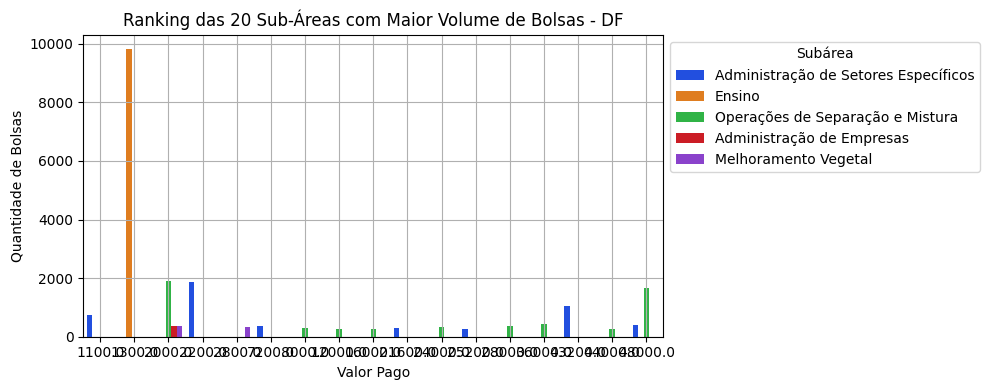

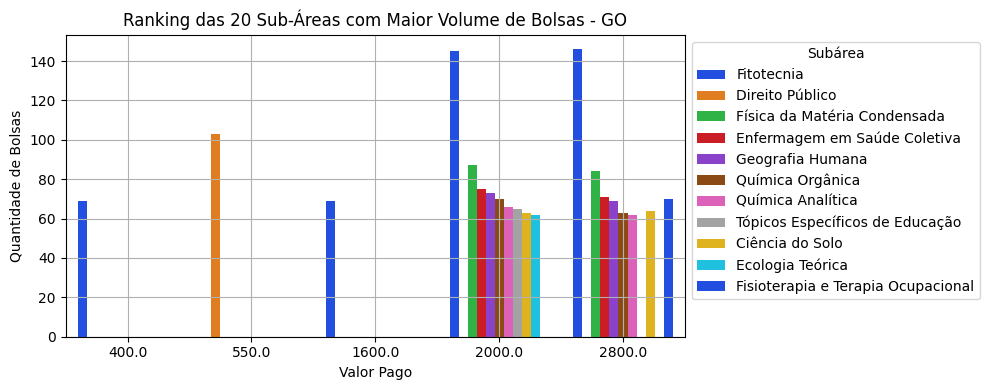

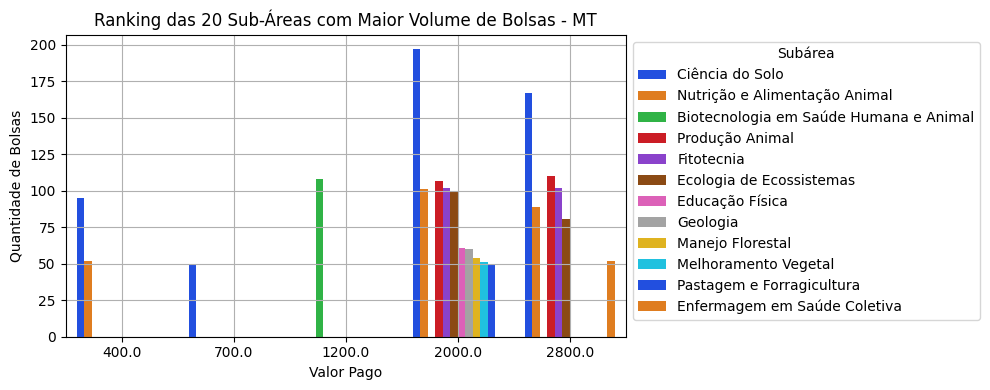

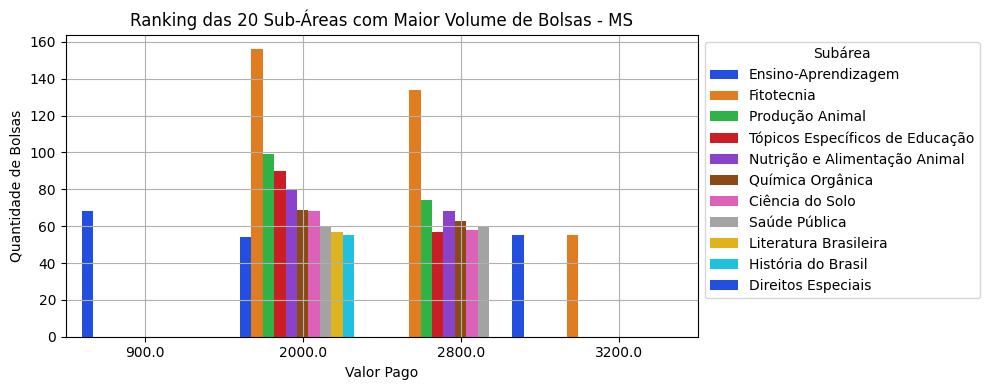

In [ ]:
for key, value in analise_2_centro_oeste.items():
    plt.figure(figsize=(10, 4))
    ax = sns.barplot(x='Valor Pago', y='Qtd Valor por Subarea', data=value, palette='bright', hue='Subárea', legend=True)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.title(f'Ranking das 20 Sub-Áreas com Maior Volume de Bolsas - {key}')
    plt.xlabel('Valor Pago')
    plt.ylabel('Quantidade de Bolsas')
    plt.tight_layout()
    plt.grid()
    plt.show()

#### *Região Sudeste*

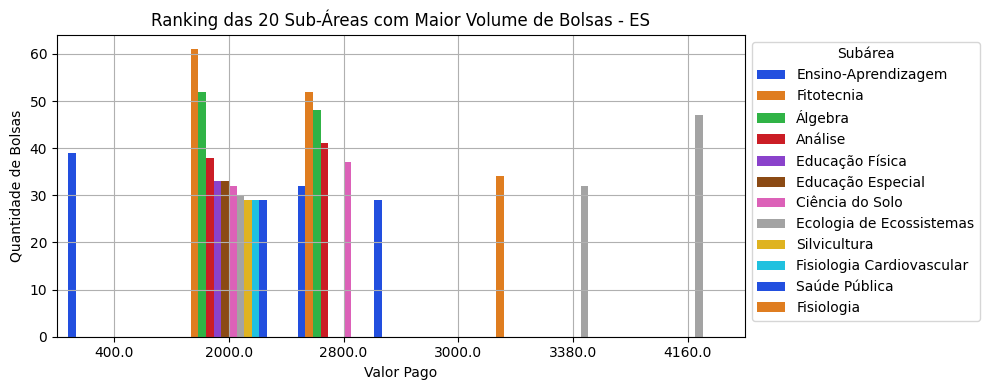

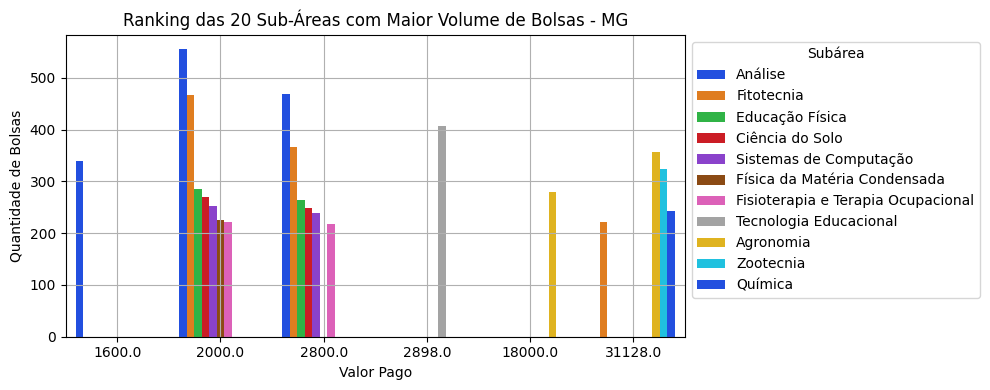

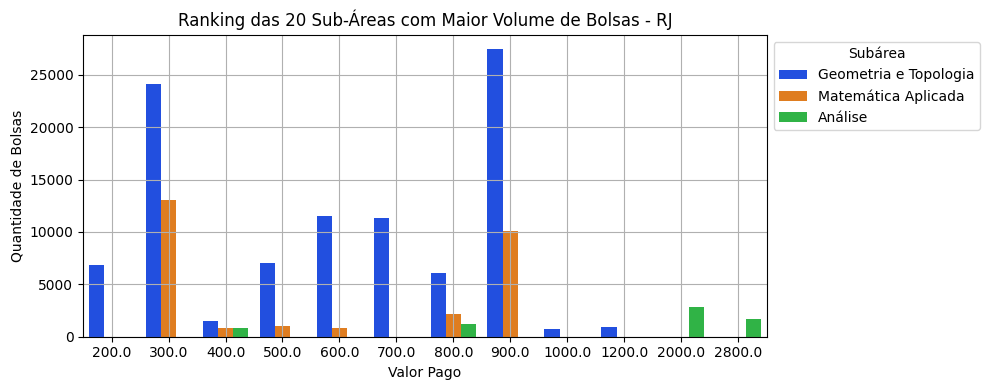

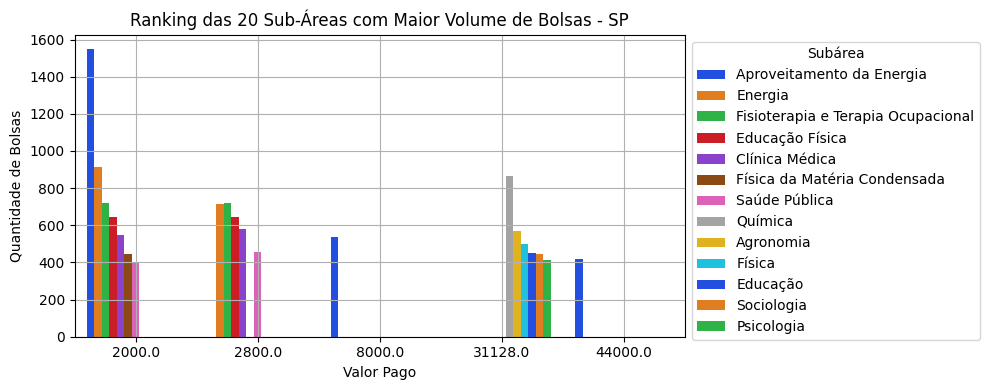

In [ ]:
for key, value in analise_2_sudeste.items():
    plt.figure(figsize=(10, 4))
    ax = sns.barplot(x='Valor Pago', y='Qtd Valor por Subarea', data=value, palette='bright', hue='Subárea', legend=True)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.title(f'Ranking das 20 Sub-Áreas com Maior Volume de Bolsas - {key}')
    plt.xlabel('Valor Pago')
    plt.ylabel('Quantidade de Bolsas')
    plt.tight_layout()
    plt.grid()
    plt.show()

#### *Região Sul*

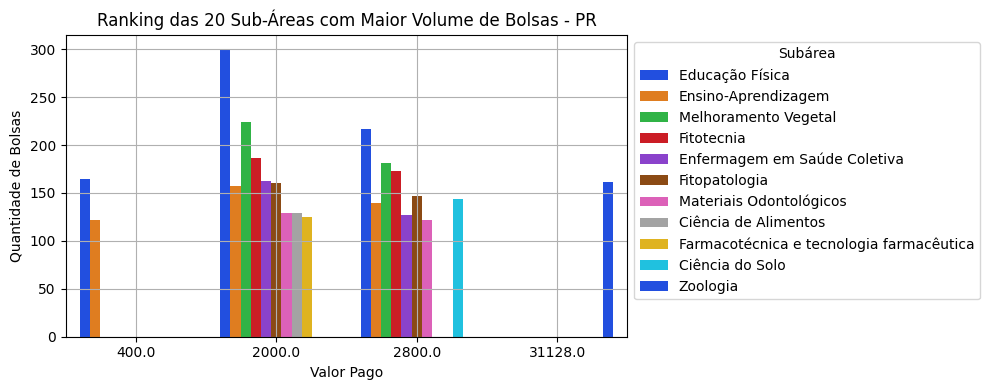

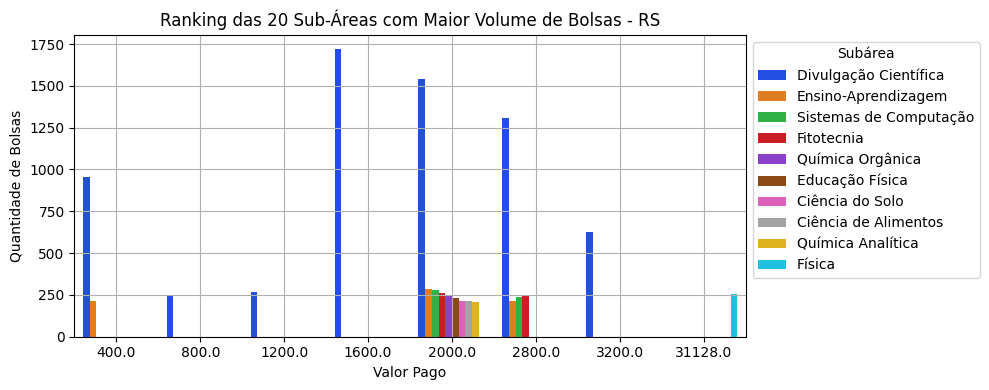

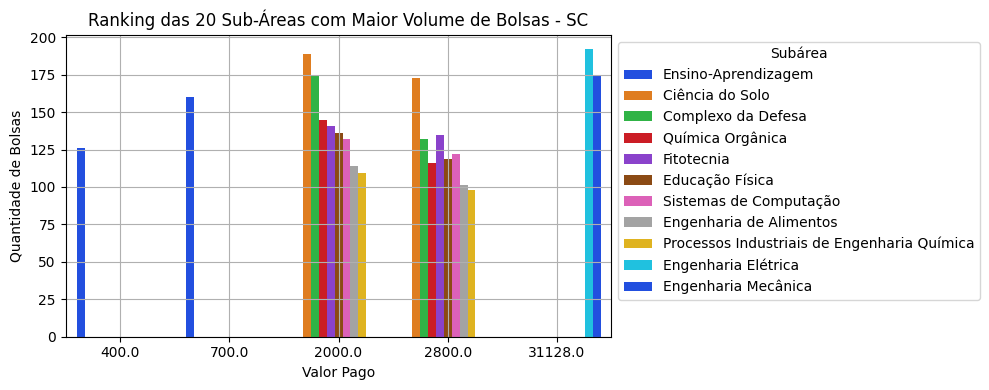

In [ ]:
for key, value in analise_2_sul.items():
    plt.figure(figsize=(10, 4))
    ax = sns.barplot(x='Valor Pago', y='Qtd Valor por Subarea', data=value, palette='bright', hue='Subárea', legend=True)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.title(f'Ranking das 20 Sub-Áreas com Maior Volume de Bolsas - {key}')
    plt.xlabel('Valor Pago')
    plt.ylabel('Quantidade de Bolsas')
    plt.tight_layout()
    plt.grid()
    plt.show()

## "Existem Modalidades predominantes ou elas são bem distribuídas?"

In [59]:
analise_3 = dataset.copy()
analise_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2613398 entries, 0 to 2680022
Data columns (total 16 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Ano Referência             int64  
 1   Processo                   object 
 2   Beneficiário               object 
 3   Linha de Fomento           object 
 4   Modalidade                 object 
 5   Nome Chamada               object 
 6   Programa CNPq              object 
 7   Grande Área                object 
 8   Área                       object 
 9   Subárea                    object 
 10  Instituição Destino        object 
 11  Sigla Instituição Destino  object 
 12  Sigla Instituição Macro    object 
 13  Cidade Destino             object 
 14  Sigla UF Destino           object 
 15  Valor Pago                 float64
dtypes: float64(1), int64(1), object(14)
memory usage: 403.5+ MB


In [60]:
analise_3 = analise_3.groupby('Modalidade')['Modalidade'].count().sort_values(ascending=False).reset_index(name='Qtd Registros')
analise_3

,Modalidade,Qtd Registros
0,IC - Iniciação Científica,895228
1,PQ - Produtividade em Pesquisa,346027
2,GM - Mestrado,285766
3,ICJ - Iniciação Científica Júnior,266980
4,GD - Doutorado,253738
...,...,...
64,DDC - Bolsa de Divulgação e Disseminação Cient...,5
65,ITS - Interiorização do Trabalho em Saúde,3
66,GDE - Doutorado no Exterior,3
67,EP - Bolsa de Treinamento no Pais,2


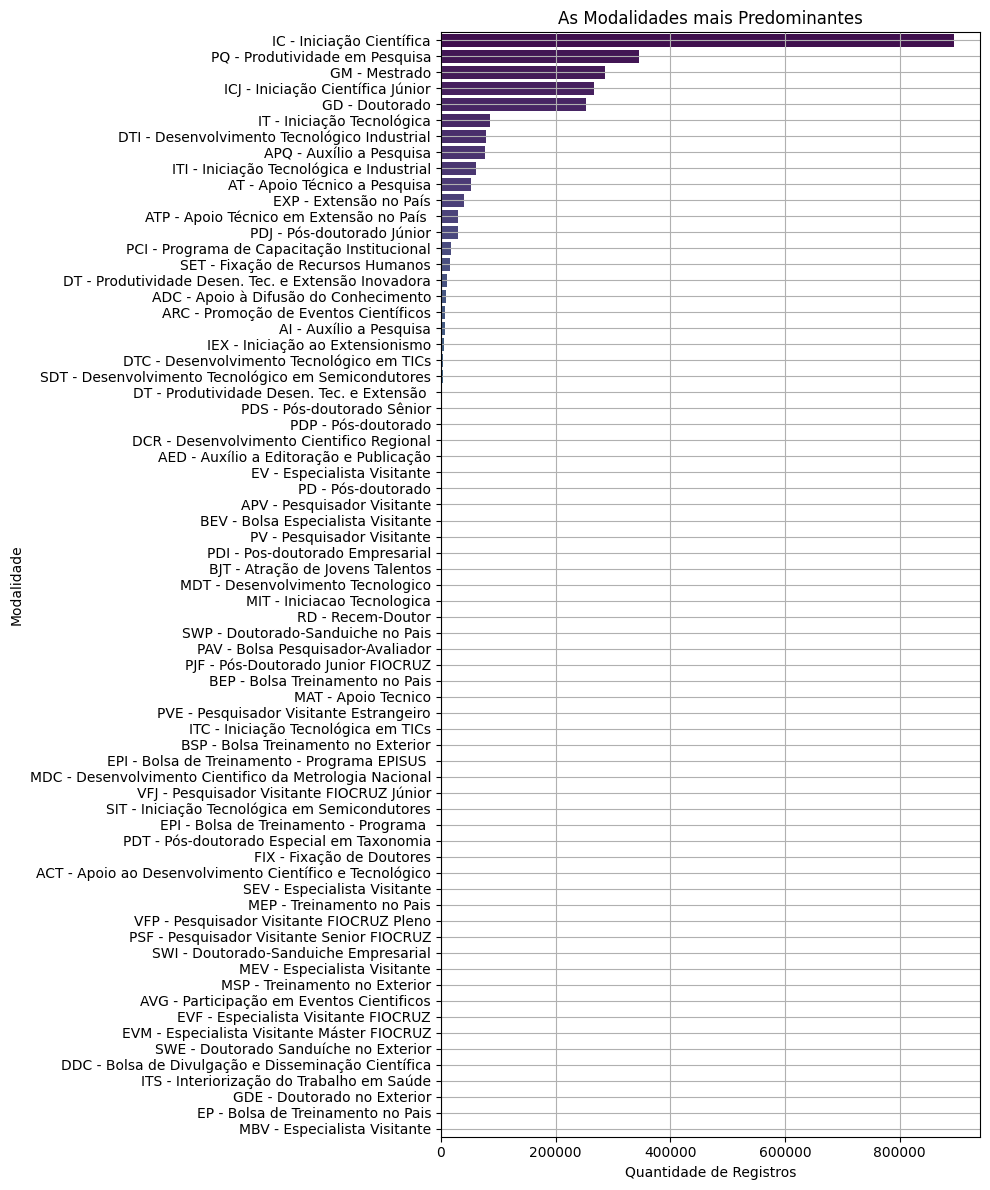

In [61]:
plt.figure(figsize=(10, 12))
sns.barplot(x='Qtd Registros', y='Modalidade', data=analise_3, palette='viridis', hue='Modalidade', legend=False)
plt.title('As Modalidades mais Predominantes')
plt.xlabel('Quantidade de Registros')
plt.ylabel('Modalidade')
plt.tight_layout()
plt.grid()
plt.show()

Observando o gráfico, podemos notar que há modalidades que se destacam e podemos observa-las ao separalas das demais.

In [62]:
analise_3 = analise_3[:15]
analise_3

,Modalidade,Qtd Registros
0,IC - Iniciação Científica,895228
1,PQ - Produtividade em Pesquisa,346027
2,GM - Mestrado,285766
3,ICJ - Iniciação Científica Júnior,266980
4,GD - Doutorado,253738
5,IT - Iniciação Tecnológica,85177
6,DTI - Desenvolvimento Tecnológico Industrial,78341
7,APQ - Auxílio a Pesquisa,77745
8,ITI - Iniciação Tecnológica e Industrial,61033
9,AT - Apoio Técnico a Pesquisa,52128


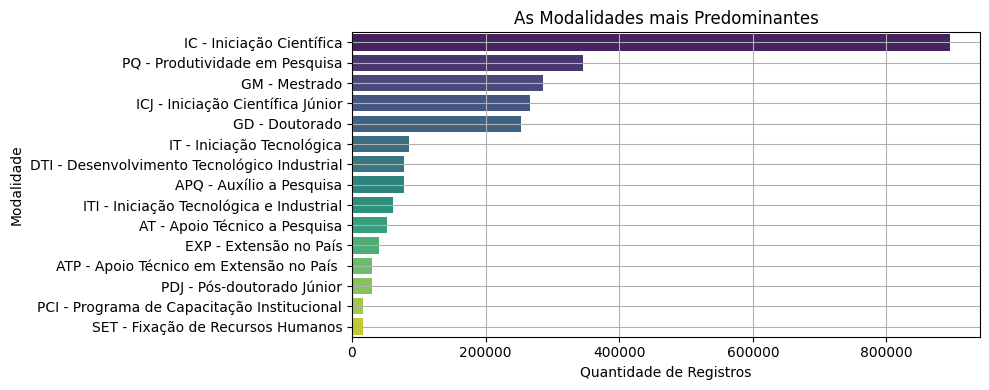

In [63]:
plt.figure(figsize=(10, 4))
sns.barplot(x='Qtd Registros', y='Modalidade', data=analise_3, palette='viridis', hue='Modalidade', legend=False)
plt.title('As Modalidades mais Predominantes')
plt.xlabel('Quantidade de Registros')
plt.ylabel('Modalidade')
plt.tight_layout()
plt.grid()
plt.show()